<a href="https://colab.research.google.com/github/ltrafael/The-Impact-of-the-Pandemic-on-the-Housing-Market-in-Brazil/blob/main/The%20Impact%20of%20the%20Pandemic%20on%20the%20Housing%20Market%20in%20Brazil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Impact of the Pandemic on the Housing Market in Brazil

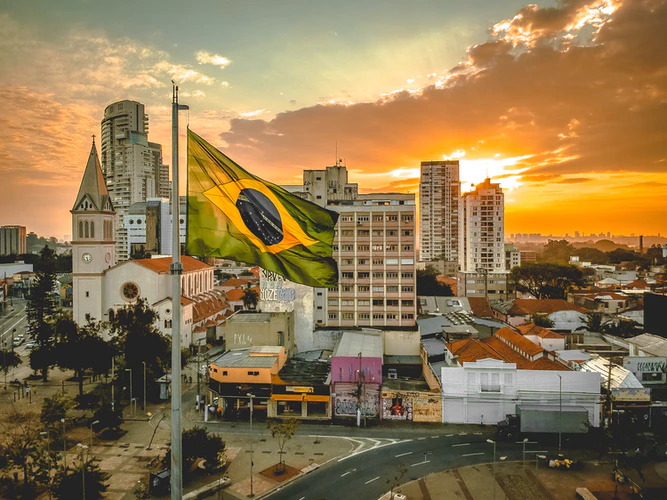

This notebook was developed alongside a Power BI dashboard with further interactive visualizations and analysis. To access the dashboard and other content, please visit the [Github repository](https://github.com/ltrafael/The-Impact-of-the-Pandemic-on-the-Housing-Market-in-Brazil). The authors of this project are:
- Rafael: [Linkedin](https://www.linkedin.com/in/rafaellt/) and [portfolio](https://ltrafael.github.io/Rafael_Portfolio/)
- Talles: [Linkedin](https://www.linkedin.com/in/talles-di-cunto/) and [portfolio](https://ambientals.github.io/Talles_Portfolio/)

It is important to emphasize that this project was done for educational purposes only, and conclusions derived from it should not be considered as objective truth and be used blindly for decision making. That being said, it can be used alongside other sources of information, since data was gathered from respectable sources. 

The purpose of this project was to explore available data and to identify a potential economic effect of the pandemic on the housing market in Brazils biggest cities. To do so, the 3 following objectives were set:

1. How did the pandemic trends behave in Brazilian capitals and on a national level?
2. How did the housing market trends behave before and during the pandemic period, for the selected capitals?
3. Did the pandemic affect the housing market in Brazil, specifically the rent and sell prices?

This project is comprised of 3 main parts, the first extracts and treats the data (ETL), the second contains exploratory data analysis and the third is for machine learning models for time series prediction.



# Extracting and treating data:


COVID-19 data was obtained from https://covid.saude.gov.br, and real estate data was obtained from .... Both datasets are panel data, meaning they contain multiple time series variables.

In [1]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## COVID-19 Data

In [2]:
# import libraries
import pandas as pd # dataframes
import numpy as np # algebra etc.

# supress warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# import data from drive
# although the file is a csv, it is required to use a semicolon as a separator, this avoids mixing data from different columns
df_covid = pd.read_csv(r'/content/drive/My Drive/Dashboard covid setor imobiliario/1 - Dados/HIST_PAINEL_COVIDBR_10jan2021.csv', 
                       sep=';', header=0)

In [4]:
# first 5 rows
df_covid.head()

regiao estado  ... emAcompanhamentoNovos  interior/metropolitana
0  Brasil    NaN  ...                   NaN                     NaN
1  Brasil    NaN  ...                   NaN                     NaN
2  Brasil    NaN  ...                   NaN                     NaN
3  Brasil    NaN  ...                   NaN                     NaN
4  Brasil    NaN  ...                   NaN                     NaN

[5 rows x 17 columns]

In [5]:
# (rows x columns)
df_covid.shape

(1630379, 17)

In [6]:
# null values and columns types
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1630379 entries, 0 to 1630378
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   regiao                  1630379 non-null  object 
 1   estado                  1630057 non-null  object 
 2   municipio               1615300 non-null  object 
 3   coduf                   1630379 non-null  int64  
 4   codmun                  1621390 non-null  float64
 5   codRegiaoSaude          1615300 non-null  float64
 6   nomeRegiaoSaude         1615300 non-null  object 
 7   data                    1630379 non-null  object 
 8   semanaEpi               1630379 non-null  int64  
 9   populacaoTCU2019        1624289 non-null  float64
 10  casosAcumulado          1630379 non-null  int64  
 11  casosNovos              1630379 non-null  int64  
 12  obitosAcumulado         1630379 non-null  int64  
 13  obitosNovos             1630379 non-null  int64  
 14  Re

Columns *Recuperadosnovos* and *emAcompanhamentoNovos* have a little over 200 non null values, so they were removed.

In [7]:
# drops both columns
df_covid.drop(['Recuperadosnovos', 'emAcompanhamentoNovos'], axis=1, inplace=True)

In [8]:
# change types

# data type datetime
df_covid['data'] = pd.to_datetime(df_covid['data']) 

# function for changing data types to int32, this reduces memory required
# some columns have missing data, so this procedure was made after splitting
# the dataframe into one for Brazil and one for the states
def convert_cols(df):
  for col in df.columns:
    if (df[col].dtype != 'object') & (df[col].dtype != 'datetime64[ns]'):
      df[col] = df[col].astype('int32')

### By country:

In [9]:
# BRAZIL
df_covidBR = df_covid[df_covid['regiao'] == 'Brasil'].copy()

# removing unnecessary columns
df_covidBR.drop(['regiao', 
                 'estado', 
                 'municipio', 
                 'coduf', 
                 'codmun', 
                 'codRegiaoSaude', 
                 'nomeRegiaoSaude', 
                 'interior/metropolitana'], axis=1, inplace=True)
df_covidBR.head()

data  semanaEpi  ...  obitosAcumulado  obitosNovos
0 2020-02-25          9  ...                0            0
1 2020-02-26          9  ...                0            0
2 2020-02-27          9  ...                0            0
3 2020-02-28          9  ...                0            0
4 2020-02-29          9  ...                0            0

[5 rows x 7 columns]

In [10]:
# all non null values
df_covidBR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322 entries, 0 to 321
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   data              322 non-null    datetime64[ns]
 1   semanaEpi         322 non-null    int64         
 2   populacaoTCU2019  322 non-null    float64       
 3   casosAcumulado    322 non-null    int64         
 4   casosNovos        322 non-null    int64         
 5   obitosAcumulado   322 non-null    int64         
 6   obitosNovos       322 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 20.1 KB


There are no missing values left, data type conversion is now possible.

In [11]:
# applies created function
convert_cols(df_covidBR)
df_covidBR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322 entries, 0 to 321
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   data              322 non-null    datetime64[ns]
 1   semanaEpi         322 non-null    int32         
 2   populacaoTCU2019  322 non-null    int32         
 3   casosAcumulado    322 non-null    int32         
 4   casosNovos        322 non-null    int32         
 5   obitosAcumulado   322 non-null    int32         
 6   obitosNovos       322 non-null    int32         
dtypes: datetime64[ns](1), int32(6)
memory usage: 12.6 KB


In [12]:
# translating column names
df_covidBR.rename(columns={'data': 'Date', 
                           'semanaEpi': 'Epiweek', 
                           'populacaoTCU2019': 'Population', 
                           'casosAcumulado': 'AccumulatedCases', 
                           'casosNovos': 'NewCases', 
                           'obitosAcumulado': 'AccumulatedDeaths', 
                           'obitosNovos': 'Deaths'}, 
                           inplace=True)

### By cities:

In [13]:
# drops rows with missing values on the 'municipio' column
# only for brazil data this field is empty
df_covidM = df_covid.dropna(subset=['municipio']).copy()
df_covidM.head()

regiao estado  ... obitosNovos  interior/metropolitana
9279  Norte     RO  ...           0                     0.0
9280  Norte     RO  ...           0                     0.0
9281  Norte     RO  ...           0                     0.0
9282  Norte     RO  ...           0                     0.0
9283  Norte     RO  ...           0                     0.0

[5 rows x 15 columns]

In [14]:
# missing values and data types
df_covidM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1615300 entries, 9279 to 1630378
Data columns (total 15 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   regiao                  1615300 non-null  object        
 1   estado                  1615300 non-null  object        
 2   municipio               1615300 non-null  object        
 3   coduf                   1615300 non-null  int64         
 4   codmun                  1615300 non-null  float64       
 5   codRegiaoSaude          1615300 non-null  float64       
 6   nomeRegiaoSaude         1615300 non-null  object        
 7   data                    1615300 non-null  datetime64[ns]
 8   semanaEpi               1615300 non-null  int64         
 9   populacaoTCU2019        1615300 non-null  float64       
 10  casosAcumulado          1615300 non-null  int64         
 11  casosNovos              1615300 non-null  int64         
 12  obitosAcumu

In [15]:
# removing unnecessary columns
df_covidM.drop(['coduf', 
                'codmun', 
                'codRegiaoSaude', 
                'interior/metropolitana'], axis=1, inplace=True)

# applies created function
convert_cols(df_covidM)

# checks for missing values and data types
df_covidM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1615300 entries, 9279 to 1630378
Data columns (total 11 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   regiao            1615300 non-null  object        
 1   estado            1615300 non-null  object        
 2   municipio         1615300 non-null  object        
 3   nomeRegiaoSaude   1615300 non-null  object        
 4   data              1615300 non-null  datetime64[ns]
 5   semanaEpi         1615300 non-null  int32         
 6   populacaoTCU2019  1615300 non-null  int32         
 7   casosAcumulado    1615300 non-null  int32         
 8   casosNovos        1615300 non-null  int32         
 9   obitosAcumulado   1615300 non-null  int32         
 10  obitosNovos       1615300 non-null  int32         
dtypes: datetime64[ns](1), int32(6), object(4)
memory usage: 110.9+ MB


In [16]:
# translating column names
df_covidM.rename(columns={'regiao': 'Region', 
                           'estado': 'Estate', 
                           'municipio': 'City', 
                           'nomeRegiaoSaude': 'HealthcareArea', 
                           'data': 'Date', 
                           'semanaEpi': 'Epiweek', 
                           'populacaoTCU2019': 'Population', 
                           'casosAcumulado': 'AccumulatedCases', 
                           'casosNovos': 'NewCases', 
                           'obitosAcumulado': 'AccumulatedDeaths', 
                           'obitosNovos': 'Deaths'}, 
                           inplace=True)

In [17]:
# descriptive statistics
np.round(df_covidM.describe(), 3)

Epiweek    Population  ...  AccumulatedDeaths       Deaths
count  1615300.000  1.615300e+06  ...        1615300.000  1615300.000
mean        32.466  3.772839e+04  ...             17.965        0.126
std         12.625  2.214382e+05  ...            214.866        1.699
min          1.000  7.810000e+02  ...              0.000     -238.000
25%         22.000  5.446000e+03  ...              0.000        0.000
50%         33.000  1.163100e+04  ...              1.000        0.000
75%         43.000  2.549200e+04  ...              6.000        0.000
max         53.000  1.225202e+07  ...          16130.000      245.000

[8 rows x 6 columns]

The columns for new cases (casosNovos) and deaths (obitosNovos) have negative numbers. The columns for cumulative cases and deaths take into account those negative values, on certain days, total number of cases or deaths decreases.

This can be attributed to errors in COVID-19 tests either pre or post mortem. This can cause the numbers to decrease to the point of dropping below zero, in an attempt to correct the misclassification.

Beyond this, there are no plausible explanations the authors are aware of that justify negative values being present in daily new cases and deaths data. The data was kept  as is regarding this factor.

This concludes the steps for treating COVID-19 data.

In [18]:
# convert tables into csv and saves files on drive
#df_covidBR.to_csv('/content/drive/My Drive/Dashboard covid setor imobiliario/1 - Dados/COVID BR.csv')
#df_covidM.to_csv('/content/drive/My Drive/Dashboard covid setor imobiliario/1 - Dados/COVID Municípios.csv')

## Real Estate Data

In [19]:
# shows all sheets in the file
file1 = pd.ExcelFile('/content/drive/My Drive/Dashboard covid setor imobiliario/1 - Dados/DADOS FIPEZAP_2.xlsx')
file1.sheet_names

['Resumo',
 'Aux',
 'Índice FipeZap',
 'São Paulo',
 'Barueri',
 'Campinas',
 'Diadema',
 'Guarujá',
 'Guarulhos',
 'Osasco',
 'Praia Grande',
 'Ribeirão Preto',
 'Santo André',
 'Santos',
 'São Bernardo do Campo',
 'São Caetano do Sul',
 'São José do Rio Preto',
 'São José dos Campos',
 'São Vicente',
 'Rio de Janeiro',
 'Niterói',
 'Belo Horizonte',
 'Betim',
 'Contagem',
 'Brasília',
 'Salvador',
 'Fortaleza',
 'Porto Alegre',
 'Canoas',
 'Caxias do Sul',
 'Novo Hamburgo',
 'Pelotas',
 'Santa Maria',
 'São Leopoldo',
 'Curitiba',
 'Londrina',
 'São José dos Pinhais',
 'Florianópolis',
 'Balneário Camboriú',
 'Blumenau',
 'Itajaí',
 'Itapema',
 'Joinville',
 'São José',
 'Vitória',
 'Vila Velha',
 'Goiânia',
 'João Pessoa',
 'Campo Grande',
 'Maceió',
 'Manaus',
 'Recife',
 'Jaboatão dos Guararapes']

In [20]:
# removes the first 3 sheets, that are not necessary
remove = ['Resumo', 'Aux', 'Índice FipeZap']
planilhas = [s for s in file1.sheet_names if s not in remove]

In [21]:
# creates empty dataframe
df_imob = pd.DataFrame()

for planilha in planilhas:
  df_aux = pd.read_excel('/content/drive/My Drive/Dashboard covid setor imobiliario/1 - Dados/DADOS FIPEZAP_2.xlsx', 
                        sheet_name=planilha,                   # load one sheet at a time
                        header=3,                              # skip first 3 rows of titles
                        usecols=[1, 17, 37, 42, 50, 54, 55],   # utilizes only certain columns
                        skipfooter=5,                          # skip footnotes
                        names=['Date',                         # give columns custom names
                               'Average Residential Sale /m2', 
                               'Average Residential Rent /m2', 
                               'Residential Rentability', 
                               'Average Comercial Sale /m2', 
                               'Average Comercial Rent /m2', 
                               'Comercial Rentability'])
  
  # adds column with city name for each sheet
  df_aux['City'] = planilha
  # concatenates empty dataframe with dataframe for each city
  df_imob = pd.concat([df_imob, df_aux])

In [22]:
# replaces missing values represented by a dot with NaN
df_imob.replace('.', np.NaN, inplace=True)

In [23]:
# first 5 rows
df_imob.head()

Date  Average Residential Sale /m2  ...  Comercial Rentability       City
0 2008-01-01                   2612.011801  ...                    NaN  São Paulo
1 2008-02-01                   2632.848443  ...                    NaN  São Paulo
2 2008-03-01                   2668.657598  ...                    NaN  São Paulo
3 2008-04-01                   2715.323408  ...                    NaN  São Paulo
4 2008-05-01                   2760.406620  ...                    NaN  São Paulo

[5 rows x 8 columns]

In [24]:
# null values and column types
df_imob.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7800 entries, 0 to 155
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date                          7800 non-null   datetime64[ns]
 1   Average Residential Sale /m2  3660 non-null   float64       
 2   Average Residential Rent /m2  1553 non-null   float64       
 3   Residential Rentability       1547 non-null   float64       
 4   Average Comercial Sale /m2    533 non-null    float64       
 5   Average Comercial Rent /m2    533 non-null    float64       
 6   Comercial Rentability         531 non-null    float64       
 7   City                          7800 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 548.4+ KB


In [25]:
# lastly, removes all cities with empty Average Residential Rent /m2

# group by city, nan values
df_imob_nan = df_imob['Average Residential Rent /m2'].isna().groupby(df_imob['City'])
# list of all cities to drop
cols_to_drop = list(df_imob_nan.mean().where(df_imob_nan.mean() == 1.).dropna().index)
# selects cities not in list
df_imob = df_imob[~df_imob['City'].isin(cols_to_drop)]
# cities left are presented
df_imob['City'].unique()

array(['São Paulo', 'Barueri', 'Campinas', 'Guarulhos', 'Praia Grande',
       'Ribeirão Preto', 'Santo André', 'Santos', 'São Bernardo do Campo',
       'São José do Rio Preto', 'São José dos Campos', 'Rio de Janeiro',
       'Niterói', 'Belo Horizonte', 'Brasília', 'Salvador', 'Fortaleza',
       'Porto Alegre', 'Pelotas', 'Curitiba', 'Florianópolis',
       'Joinville', 'São José', 'Goiânia', 'Recife'], dtype=object)

In [26]:
# halved number of rows from 7800
df_imob.shape

(3900, 8)

In [27]:
# descriptive statistics
df_imob.describe()

Average Residential Sale /m2  ...  Comercial Rentability
count                   2321.000000  ...             531.000000
mean                    5613.568891  ...               0.004597
std                     1597.982179  ...               0.000680
min                     2612.011801  ...               0.003133
25%                     4466.411922  ...               0.004034
50%                     5356.432663  ...               0.004473
75%                     6442.329663  ...               0.005101
max                    10751.481885  ...               0.006363

[8 rows x 6 columns]

In [28]:
# save file as csv on drive
#df_imob.to_csv('/content/drive/My Drive/Dashboard covid setor imobiliario/1 - Dados/Imob.csv')

# Exploratory Data Analysis

With the 3 datasets ready (df_imob for real estate data, df_covidBR for COVID-19 data in Brazil and df_covidM for COVID-19 data in Brazil biggest cities), analyses were made exploring attribute behaviours and how they compare to one another and searching for patterns and correlations.

The following visualizations represent the behaviour of COVID-19 in Brazil, as public data indicates. After that COVID-19 data was analyzed for different state capitals and then real estate data.

In [49]:
# visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime
%matplotlib inline
#%matplotlib widget

# install AdjustText, library for text adjustment. Source:
# https://github.com/Phlya/adjustText
#!pip install adjustText
from adjustText import adjust_text

# increases font size
plt.rcParams.update({'axes.labelsize': 20, 
                     'axes.titlesize': 24, 
                     'xtick.labelsize': 14, 
                     'ytick.labelsize': 14, 
                     'axes.spines.right': False, 
                     'axes.spines.top': False})

  Created wheel for adjustText: filename=adjustText-0.7.3-cp37-none-any.whl size=7100 sha256=21af8184a1879b40a7ab220a14275672c1fc1517b994df7d890afadde7ffcd64
  Stored in directory: /root/.cache/pip/wheels/41/95/74/7d347e136d672f8bc28e937032bc92baf4f80856763a7e7b72
Successfully built adjustText


For the analysis of brazilian cities, only the following were considered: São Paulo, Rio de Janeiro, Belo Horizonte, Brasília, Salvador, Porto Alegre, Curitiba, Brasília, Recife, Goiânia and Fortaleza.

In [30]:
# selects cities

# city list
cities = ['São Paulo', 'Rio de Janeiro', 'Belo Horizonte', 'Brasília', 'Salvador', 'Porto Alegre', 'Curitiba', 'Florianópolis', 'Recife', 'Goiânia', 'Fortaleza']
# covid
df_covidM = df_covidM[df_covidM['City'].isin(cities)]
df_covidM.reset_index(drop=True, inplace=True)
# real estate
df_imob = df_imob[df_imob['City'].isin(cities)]
df_imob.reset_index(drop=True, inplace=True)

In [31]:
# dates
print (f"Date range on df_covidBR                : {str(df_covidBR['Date'].min().date())} - {df_covidBR['Date'].max().date()}")
for city in df_covidM['City'].unique():
    df_city = df_covidM[df_covidM['City'] == city]
    print (f"Date range on df_covidM ({city:<14}): {str(df_city['Date'].min().date())} - {df_city['Date'].max().date()}")
print (f"Date range on df_imob                   : {df_imob['Date'].min().date()} - {df_imob['Date'].max().date()}")

Date range on df_covidBR                : 2020-02-25 - 2021-01-10
Date range on df_covidM (Fortaleza     ): 2020-03-27 - 2021-01-10
Date range on df_covidM (Recife        ): 2020-03-27 - 2021-01-10
Date range on df_covidM (Salvador      ): 2020-03-27 - 2021-01-10
Date range on df_covidM (Belo Horizonte): 2020-03-27 - 2021-01-10
Date range on df_covidM (Rio de Janeiro): 2020-03-27 - 2021-01-10
Date range on df_covidM (São Paulo     ): 2020-03-27 - 2021-01-10
Date range on df_covidM (Curitiba      ): 2020-03-27 - 2021-01-10
Date range on df_covidM (Florianópolis ): 2020-03-27 - 2021-01-10
Date range on df_covidM (Porto Alegre  ): 2020-03-27 - 2021-01-10
Date range on df_covidM (Goiânia       ): 2020-03-27 - 2021-01-10
Date range on df_covidM (Brasília      ): 2020-03-27 - 2021-01-10
Date range on df_imob                   : 2008-01-01 - 2020-12-01


COVID-19 data starts in 25/02 for Brazil and 27/03 for the 11 selected cities, both end at 10/01. Real Estate data begins at 01/01/2008 and ends at 01/12/2020.

In [32]:
# population has only a single value
df_covidBR['Population'].value_counts()

210147125    322
Name: Population, dtype: int64

Brazil has a population of 210,147,125 in 2020.

In [33]:
# list of month names for plots
months = ['Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan']
months_cities = ['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan']

## COVID analysis:

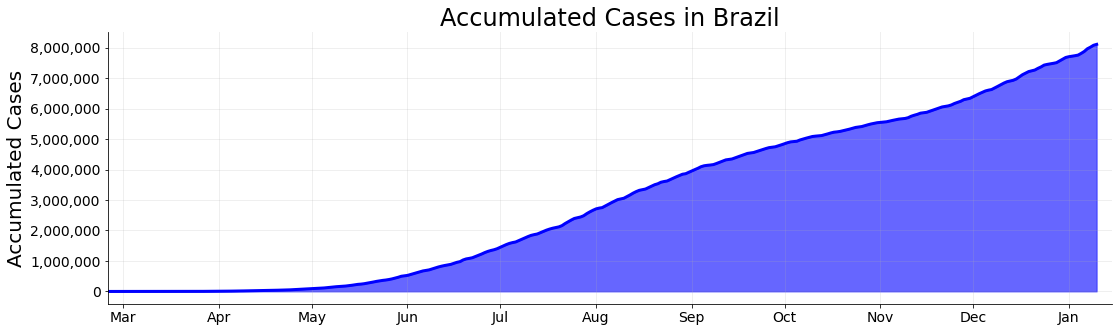

In [34]:
plt.figure(figsize=(18, 5))
ax = sns.lineplot(x='Date', y='AccumulatedCases', data=df_covidBR, linewidth=3, color='b')
ax.fill_between(df_covidBR['Date'], df_covidBR['AccumulatedCases'], color='b', alpha=0.6)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.grid(alpha=0.2, linewidth=1)
ax.set_xlim(datetime.date(2020, 2, 25), datetime.date(2021, 1, 15))
plt.ylabel('Accumulated Cases')
plt.xlabel(None)
ax.set_xticklabels(months)
plt.title('Accumulated Cases in Brazil');

In [35]:
# cases by population
Cases_pop = (df_covidBR['AccumulatedCases'].max() / df_covidBR['Population'].max()) * 1000

print (f"Total Cases by 10/01: {df_covidBR['AccumulatedCases'].max()}")
print (f'Brazil has {int(Cases_pop)} cases for every 1,000 inhabitants.')

Total Cases by 10/01: 8105790
Brazil has 38 cases for every 1,000 inhabitants.


Number of cases reaches the maximum of 8,105,790 on the last date available, December 6<sup>th</sup>. The following formula provides the number of cases by 1,000 inhabitants.

$$ Cases\;by\;Population = \frac{Total\;Cases}{Population} * 1000 $$

In other words, Brazil has had 3.8% of its population infected by COVID-19.

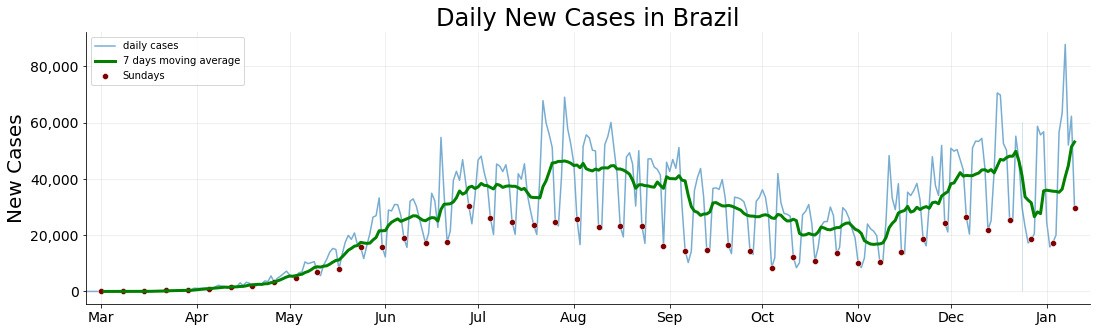

In [36]:
# day of week column
df_covidBR['dow'] = df_covidBR['Date'].dt.day_name()

# 7 days moving average
df_covidBR['mov_avgNC'] = df_covidBR['NewCases'].rolling(7).mean()

fig, ax = plt.subplots(figsize=(18, 5))
ax = sns.lineplot(x='Date', y='NewCases', data=df_covidBR, label='daily cases', alpha=0.6, zorder=1)
ax = sns.lineplot(x='Date', y='mov_avgNC', data=df_covidBR, color='g', label='7 days moving average', linewidth=3)
ax = sns.scatterplot(x='Date', y='NewCases', data=df_covidBR[df_covidBR['dow'] == 'Sunday'], color='maroon', label='Sundays', zorder=2)
plt.legend(loc='upper left')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_xlim(datetime.date(2020, 2, 25), datetime.date(2021, 1, 15))
plt.grid(alpha=0.2, linewidth=1)
plt.ylabel('New Cases')
plt.xlabel(None)
ax.set_xticklabels(months)
plt.title('Daily New Cases in Brazil')
plt.show();

#dpi = 100
#fig.savefig(r'C:\Users\Rafael\Downloads\Fig_Jupcaderno\Cases BR2 ' + str(dpi) + 'dpi.png', dpi=dpi, format='png');

Daily new cases in Brazil, as in many other countries, has an intrinsical cyclical component to it. Upon plotting the Sundays (red dots) on the graph, it was identified that throughs (lowest part of a wavelength) happen mostly on Sundays and Mondays, seldom extending to Tuesdays. COVID-19 tests take from 24 up to 48 hours for the results to get back and most tests occur during weekdays, as there is a decrease in workforce during weekends. When combined, these factors cause new cases to drop on Sundays and Mondays. Cases do not drop on Saturdays due to tests made on Fridays returning and on Tuesdays tests made on Mondays return, so only a slight decrease is observeable (see graph below).

The 7 days moving average of the series (green) represents the daily New Cases without this cyclical component. This processes is called deseasonalization and it results in a series more suitable for analysis and easier to extract insights from. 

Daily cases reached its peak in late July. After a period of steady decline, it is visible how the pandemic re-enters a period of accentuated growth. The peak just falls short of 50,000 cases, meaning that in that period Brazil had around 50,000 new cases every day. The moving average allows the identification of a steep decline in late December followed by a rise just as steep in January. During holidays, the workforce lowers considerably, which explains why the curve drops near Christmas day, analogous to weekends drops. Soon after, the peak containing the record for new cases can be attributed to people traveling and gathering, leading to a higher number of cases, as well as cases that were not reported before being reported in early January. Since the extent of these effects cannot be quantified, the real behaviour of daily cases is unclear since the steep decline on late December.

In [37]:
max_cases = df_covidBR['NewCases'].max()
max_cases_day = df_covidBR[df_covidBR['NewCases'] == df_covidBR['NewCases'].max()]['Date'].dt.day.values[0]
max_cases_month = df_covidBR[df_covidBR['NewCases'] == df_covidBR['NewCases'].max()]['Date'].dt.month_name().values[0]

print (f"Highest point for daily new cases: {max_cases}, on {max_cases_day} of {max_cases_month} of 2021.")

Highest point for daily new cases: 87843, on 7 of January of 2021.


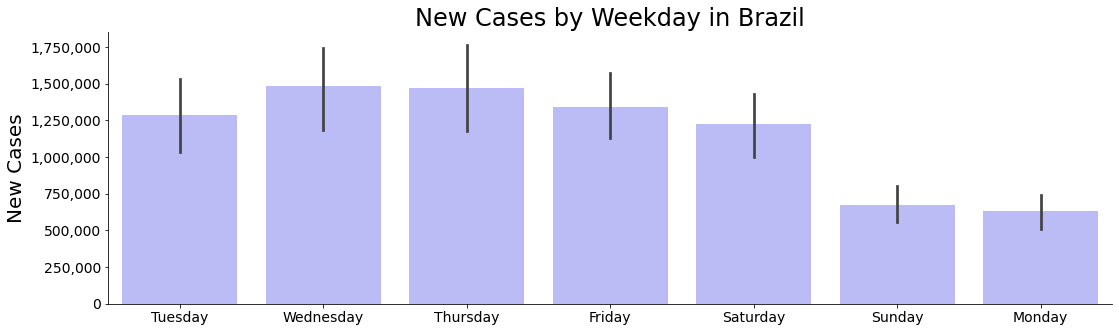

In [38]:
plt.figure(figsize=(18, 5))
ax = sns.barplot(x='dow', y='NewCases', data=df_covidBR, color='blue', alpha=0.3, estimator=sum)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.grid(False)
plt.ylabel('New Cases')
plt.xlabel(None)
plt.title('New Cases by Weekday in Brazil')
plt.show();

Sundays and Mondays sum both below 750,000 New Cases each, representing approximately half of the cases in other weekdays such as Wednesday. The slight dip in New cases on Tuesdays is also visible on this graph.

This graph indicates that the test results waiting period is more relevant than the factor of the workforce being less present in weekends. That is for the fact that on Saturdays, the sum of new cases is in line of other weekdays, and on Mondays, the amount is still low compared to other weekdays despite the workforce of a weekday. If the latter was the most relevant factor, the 2 lowest bars would be on Saturday and Sunday. There may be other factors at play which the current data does not account for, hence this is just a hypothesis.

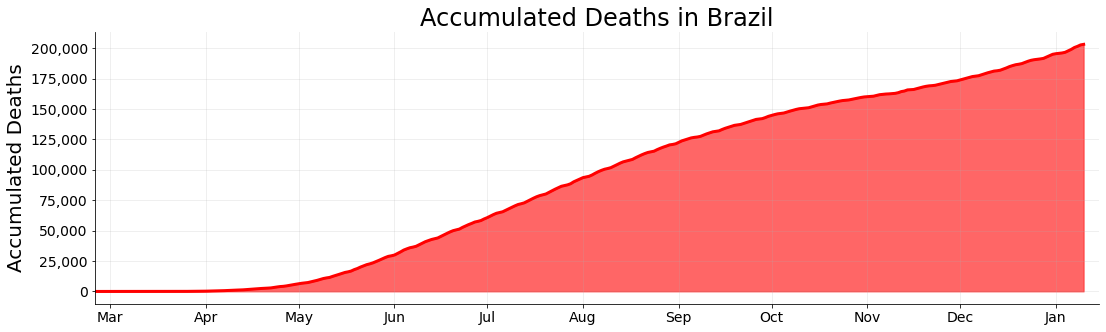

In [39]:
plt.figure(figsize=(18, 5))
ax = sns.lineplot(x='Date', y='AccumulatedDeaths', data=df_covidBR, color='r', linewidth=3)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.fill_between(df_covidBR['Date'], df_covidBR['AccumulatedDeaths'], color='r', alpha=0.6)
plt.grid(alpha=0.2, linewidth=1)
plt.ylabel('Accumulated Deaths')
plt.xlabel(None)
ax.set_xticklabels(months)
ax.set_xlim(datetime.date(2020, 2, 25), datetime.date(2021, 1, 15))
plt.title('Accumulated Deaths in Brazil');

Deaths in Brazil exceeds 200,000. The curve is quite similar in shape to the one for Accumulated Cases, which illustrates how both are associated with one another.

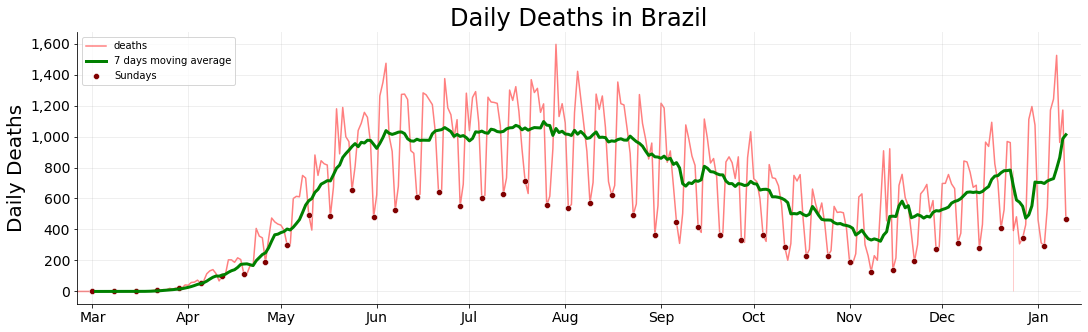

In [40]:
# 7 days moving average
df_covidBR['mov_avgD'] = df_covidBR['Deaths'].rolling(7).mean()

plt.figure(figsize=(18, 5))
ax = sns.lineplot(x='Date', y='Deaths', data=df_covidBR, color='r', alpha=0.5, label='deaths', zorder=1)
ax = sns.lineplot(x='Date', y='mov_avgD', data=df_covidBR, color='g', linewidth=3, label='7 days moving average')
ax = sns.scatterplot(x='Date', y='Deaths', data=df_covidBR[df_covidBR['dow'] == 'Sunday'], color='maroon', label='Sundays', zorder=2)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.grid(alpha=0.2, linewidth=1)
plt.ylabel('Daily Deaths')
plt.xlabel(None)
ax.set_xticklabels(months)
ax.set_xlim(datetime.date(2020, 2, 25), datetime.date(2021, 1, 15))
plt.legend(loc='upper left')
plt.title('Daily Deaths in Brazil');

Deaths and new cases share similar cyclical behaviour. The 7 days moving average represent the behaviour of Deaths without the weekly cycles. In July, daily deaths reached a peak of around 1,600 deaths in a single day in Brazil. November marks the end of the decline in daily deaths, just as it did for new cases. The increase in deaths in November is not as steep as it is for new cases, but deaths follow cases with a delay, in this case of a few days as ilustrated further below.

Both new cases and deaths begin to rise near the start of April and reach the lowest point since in early November. This wavelength of around 7 months is considered to be the pandemic's first wave. If the behaviour were to repeat itself, the end of the second wave would fall into the second half of May or the first half of June. This can be considered as a simple first prediction of how the pandemic will take place in 2021. The main factor to consider that would make this prediction unreliable is the vaccination.

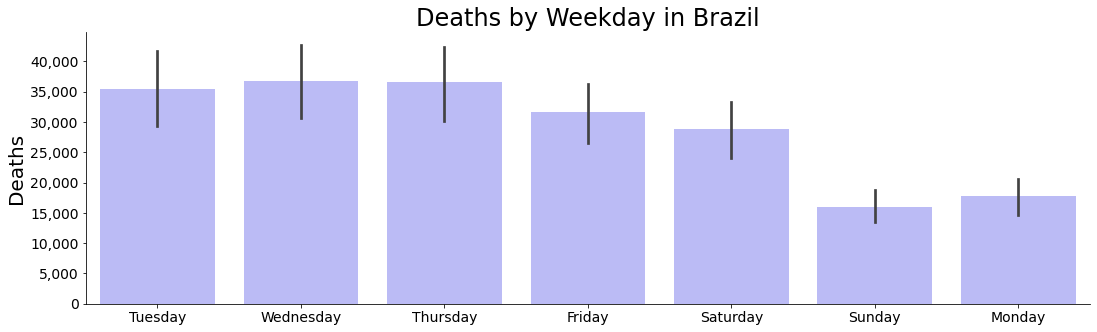

In [41]:
plt.figure(figsize=(18, 5))
ax = sns.barplot(x='dow', y='Deaths', data=df_covidBR, color='blue', alpha=0.3, estimator=sum)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.grid(False)
plt.ylabel('Deaths')
plt.xlabel(None)
plt.title('Deaths by Weekday in Brazil')
plt.show();

The distribution of daily deaths between days of the week ressembles the distribution of new cases, with Sunday and Monday having the smallest contribution to deaths. This further evidences the factor of test results waiting period being more significant in explaining the weekly cyclical component of both series.

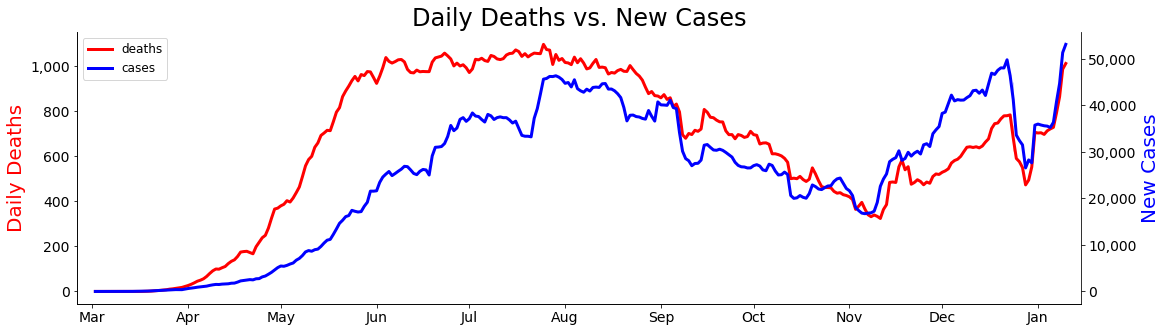

In [42]:
plt.figure(figsize=(18, 5))
ax = sns.lineplot(x='Date', y='mov_avgD', data=df_covidBR, color='r', linewidth=3, label='deaths', legend=False)
ax2 = ax.twinx()
ax2 = sns.lineplot(x='Date', y='mov_avgNC', data=df_covidBR, color='b', linewidth=3, ax=ax2, label='cases')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines + lines2, labels + labels2, loc=0, fontsize=12)
ax2.set_xlim(datetime.date(2020, 2, 25), datetime.date(2021, 1, 15))
ax2.set_xticklabels(months)
ax.set_ylabel('Daily Deaths', color='r')
ax2.set_ylabel('New Cases', color='b')
ax2.spines['right'].set_visible(True)
ax.set_xlabel(None)
plt.title('Daily Deaths vs. New Cases');
#ax.set_yticks(range(0, 3001, 1000));

The delay in deaths following new cases is visible from November onward, but not during the first wave that lasts over half of the year. More information is required to draw a conclusion for the behaviour of both lines during this wave. In the case of this delay between both variables being true, it would mean that the number of cases (at least at the beginning of the first wave) was underreported, or perhaps the number of deaths was overreported or even a combination of both.

It is curious to note that the curves switch positions on the second wave. One important factor to consider is that Brazil was late to start testing the population in general and deaths suspected of being caused by COVID-19 might have received priority for testing in the early months of the pandemic.

<Figure size 1800x1080 with 0 Axes>

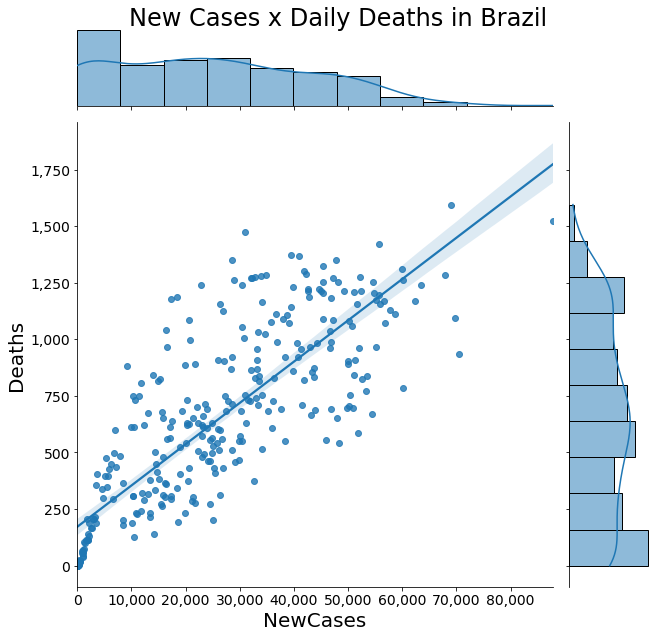


Pearson correlation coefficient: 0.819



In [43]:
# correlation between new cases and deaths
plt.figure(figsize=(25, 15))
ax = sns.jointplot(x='NewCases', y='Deaths', data=df_covidBR, height=9, kind='reg')
ax.ax_joint.get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.ax_joint.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.fig.suptitle('New Cases x Daily Deaths in Brazil', fontsize=24)
ax.fig.subplots_adjust(top=0.95)
plt.ylabel('Daily Deaths')
plt.xlabel('New Cases')
plt.show();

# correlation coefficient
corr_casos_obitos = df_covidBR['NewCases'].corr(df_covidBR['Deaths'])
print (f'\nPearson correlation coefficient: {corr_casos_obitos:.3f}\n')

As expected, there is a very strong correlation between new cases and deaths, both reported daily. This means that cases and deaths copy each other behaviour, as one grows the other also grows and vice-versa. Generally, it is the case that correlation does not implies causation. In this case, an increase in COVID-19 cases causes and increase in deaths. The delay in deaths following cases can prevent the correlation coefficient from being near 1.

Correlation coefficient $c$ ranges from -1 to 1, with -1 meaning a perfect negative linear correlation, 0 no linear correlation and 1 a perfect positive linear correlation.

On this same graph, on the top and on the right, are histograms for the 2 variables along with kernel density estimations lines (KDE). The line between the points in the scatter plot correspont to the linear regression line, with a 95% confidence interval zone around it.

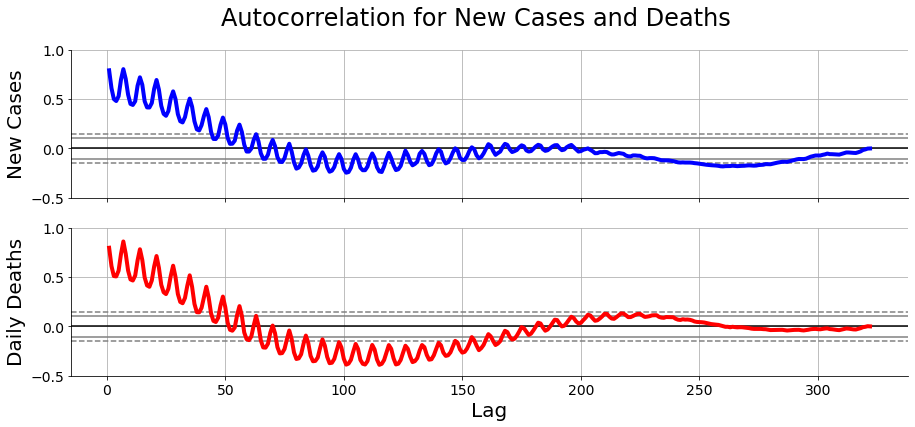

In [44]:
fig, ((ax1), (ax2)) = plt.subplots(2, 1, figsize=(15, 6), sharex=True, sharey=False)
pd.plotting.autocorrelation_plot(df_covidBR['NewCases'], ax=ax1, linewidth=4, color='b')
ax1.set_ylabel('New Cases')
ax1.set_xlabel(None)
ax1.set_ylim(-0.5, 1)
pd.plotting.autocorrelation_plot(df_covidBR['Deaths'], ax=ax2, linewidth=4, color='r')
ax2.set_ylabel('Daily Deaths')
ax2.set_ylim(-.5, 1)
fig.suptitle('Autocorrelation for New Cases and Deaths', fontsize=24);

The autocorrelation graph indicates how a variable correlates with delayed instances of itself. The Lag axis indicates the lag period between the 2 series and the vertical axis the correlation coefficient. This analysis can be useful to discover patterns in the data, in this case, it reveals the weekly cycle present in the data, as long with the bigger cycle of around 200 days. This second cycle likely represents the first and second waves.

Both New Cases and Deaths present similiar behaviour. Both drop to negative correlation at between 50 and 100 days of lag, New Cases stays negative for the most part but Deaths returns to positive values between 200 and 250 days. Although both are cyclical in a 7 day period (wavelength of ~7 between 0 and 50 days, resulting in 7 day period cycle), they do not alter between positive and negative correlation on this 7 day period. This is to be expected, since values drop mostly on Sundays and Mondays only.

It is also noteworthy how the weekly cyclical aspect diminishes with time, reaching closer to 0 correlation the bigger the time gap even though the weekly cycle is present in all of the series. This can be attributed to white noise and other patterns that dilute this effect.

The bigger cyclical components of the first 2 pandemic waves can be better visualized in the graph below, which plots the autocorrelation for the 7 days moving average of both series.

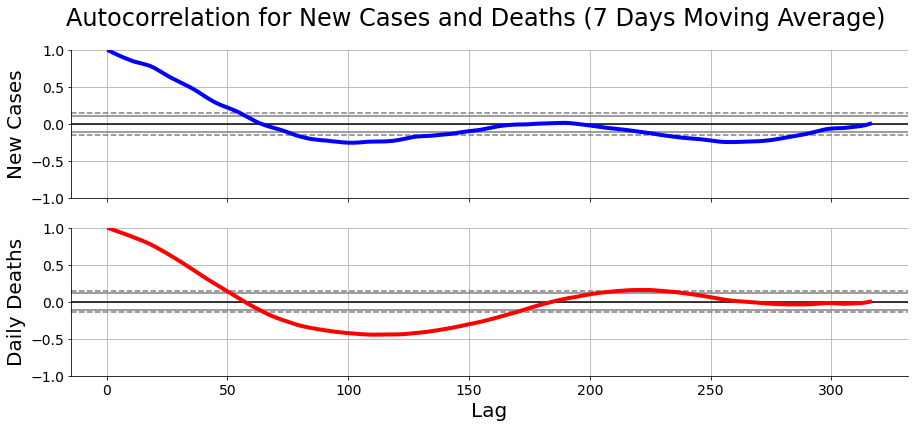

In [45]:
fig, ((ax1), (ax2)) = plt.subplots(2, 1, figsize=(15, 6), sharex=True, sharey=False)
pd.plotting.autocorrelation_plot(df_covidBR['mov_avgNC'].dropna(), ax=ax1, linewidth=4, color='b')
ax1.set_ylabel('New Cases')
ax1.set_xlabel(None)
ax1.set_ylim(-1, 1)
pd.plotting.autocorrelation_plot(df_covidBR['mov_avgD'].dropna(), ax=ax2, linewidth=4, color='r')
ax2.set_ylabel('Daily Deaths')
ax2.set_ylim(-1, 1)
fig.suptitle('Autocorrelation for New Cases and Deaths (7 Days Moving Average)', fontsize=24);

The wavelenght of new cases falls short of 200 days, and this period is the first wave of the pandemic. This period is similar to the one obtained earlier that was used to predict that the end of the second wave would fall near May of 2021.

Both lines approach 0 correlation the higher the lag period. This indicates that there are no relevant cyclical components of more than 300 days and the limited amount of data points wouldn't allow for an identification of bigger cycles. 

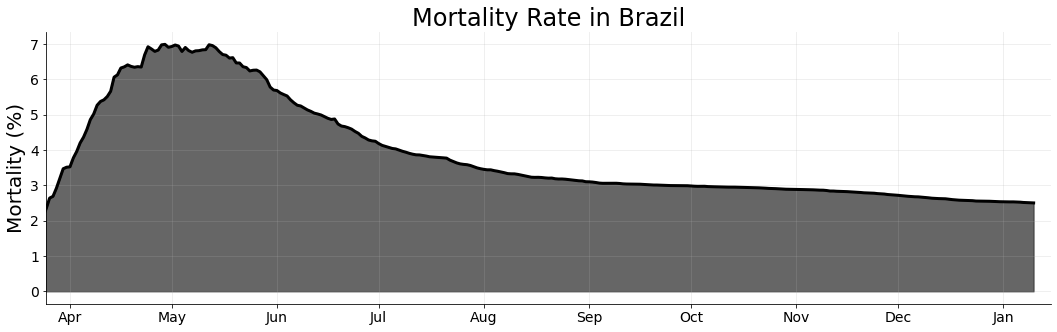

In [46]:
# mortality analysis
# eliminating 0 deaths values avoids mortality staying at 0, for a better visualization
df_mort = df_covidBR[df_covidBR['AccumulatedDeaths'] != 0].copy()
df_mort['Mortality'] = (df_mort['AccumulatedDeaths'] / df_mort['AccumulatedCases']) * 100

plt.figure(figsize=(18, 5))
ax = sns.lineplot(x='Date', y='Mortality', data=df_mort, color='k', linewidth=3)
ax.fill_between(df_mort['Date'], df_mort['Mortality'], color='k', alpha=0.6)
plt.grid(alpha=0.2, linewidth=1)
plt.title('Mortality Rate in Brazil')
plt.ylabel('Mortality (%)')
plt.xlabel(None)
ax.set_xlim(datetime.date(2020, 3, 25), datetime.date(2021, 1, 15))
ax.set_xticklabels(months[1:]);

Mortality rate was obtained via the below formula:

$$  Mortality \;Rate = \frac{Accumulated\; Deaths}{Accumulated \;Cases} * 100 $$

Mortality rates in Brazil reached approximately 7% between April and June, period in which the country was not prepared to deal with the COVID-19 cases and a lot of people did not receive proper medical care nor access to respirators and other medical devices.

In January, the mortality rate steadily decreases below 3%. It is important to reiterate that this data may not represent the reality, as there are a lot of masked cases and deaths which were not accounted for, as well as undertesting. We must also consider that a decrease in mortality does not necessarily mean that less people are dying from COVID-19, it may be the case that more tests are being made and are more publicly available and/or that COVID-19 deaths are flagged as something else. In 2020, there was a spike in acute respiratory distress syndrome (ARDS) cases and deaths in Brazil.

Mortality was also analyzed monthly. This is to better visualize how the pandemic behaved separately on a monthly basis without the influence of past months, both in terms of new cases and deaths.

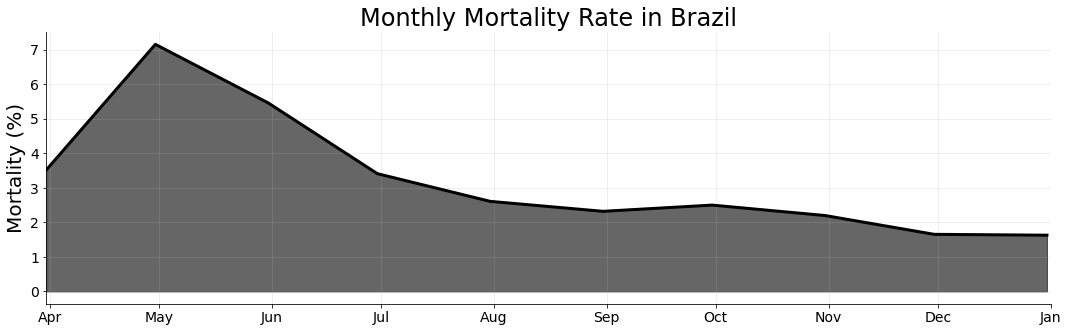

In [47]:
# filter data for last day of each month
monthly = ['2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31', '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31']
df_mort_monthly = df_mort[df_mort['Date'].isin(monthly)].copy()

# add columns for shifted by 1 values, this makes calculating monthly values easier
df_mort_monthly['AccCases'] = df_mort_monthly['AccumulatedCases'].shift(1)
df_mort_monthly['AccDeaths'] = df_mort_monthly['AccumulatedDeaths'].shift(1)

# same formula for mortality, but only for values for each month
df_mort_monthly['Mort_monthly'] = 100 * (df_mort_monthly['AccumulatedDeaths'] - df_mort_monthly['AccDeaths']) / (df_mort_monthly['AccumulatedCases'] - df_mort_monthly['AccCases'])
df_mort_monthly.loc[35, 'Mort_monthly'] = 100 * df_mort_monthly.loc[35, 'AccumulatedDeaths'] / df_mort_monthly.loc[35, 'AccumulatedCases']

plt.figure(figsize=(18, 5))
ax = sns.lineplot(x='Date', y='Mort_monthly', data=df_mort_monthly, color='k', linewidth=3)
ax.fill_between(df_mort_monthly['Date'], df_mort_monthly['Mort_monthly'], color='k', alpha=0.6)
plt.grid(alpha=0.2, linewidth=1)
plt.title('Monthly Mortality Rate in Brazil')
plt.ylabel('Mortality (%)')
plt.xlabel(None)
ax.set_xlim(datetime.date(2020, 3, 31), datetime.date(2021, 1, 1))
ax.set_xticklabels(months[1:]);

Monthly mortality does not differ considerably from overall mortality. On December of 2020 rates drop below 2%, indicating a better response from Brazil in dealing with the pandemic. 

The following plots for this section consider all 11 cities.

In [50]:
# palette colors
palette_dict = {}
for i, c in enumerate(df_covidM['City'].unique()):
    palette_dict[c] = sns.color_palette(n_colors=len(df_covidM['City'].unique()))[i]

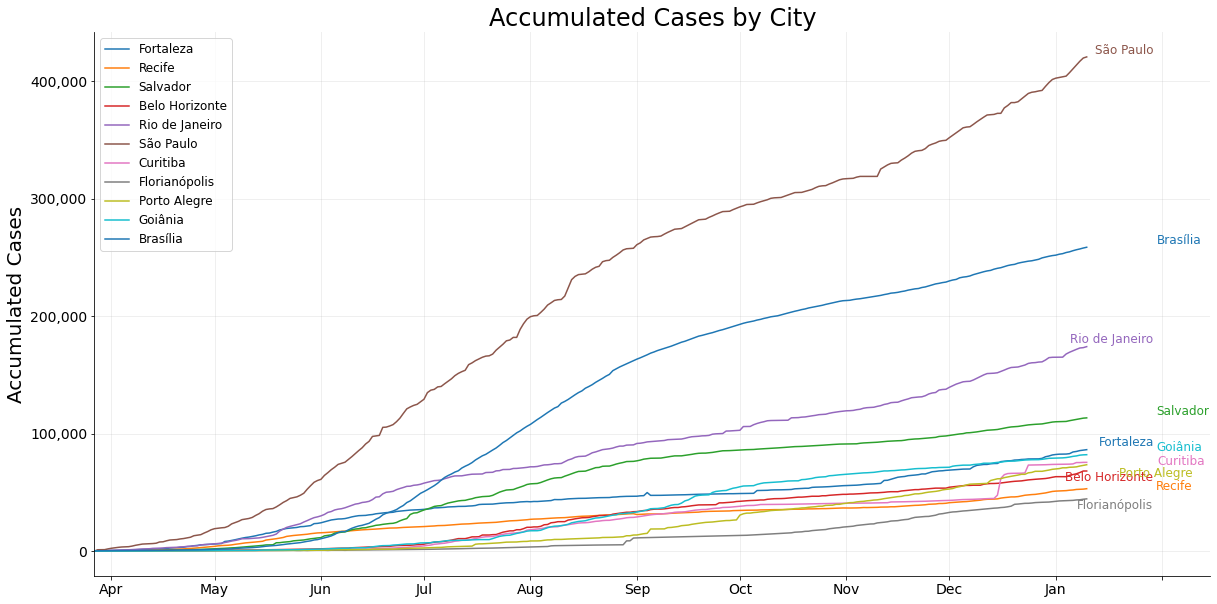

In [51]:
plt.figure(figsize=(20, 10))
ax = sns.lineplot(x='Date', y='AccumulatedCases', data=df_covidM, hue='City', palette=palette_dict)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_xticklabels(months_cities)
plt.legend(loc='upper left', fontsize=12)
ax.set_xlim(datetime.date(2020, 3, 27), datetime.date(2021, 2, 15))
ax.set_ylabel('Accumulated Cases')
ax.set_xlabel(None)
plt.grid(alpha=0.2, linewidth=1)
plt.title('Accumulated Cases by City')

# city names text
texts = [plt.text(pd.Timestamp("2021-1-30"), 
             df_covidM.loc[df_covidM['City'] == i, 'AccumulatedCases'][-1:].values[0], 
             i, 
             fontsize=12, 
             color=palette_dict[i]) for i in df_covidM['City'].unique()]

adjust_text(texts, autoalign='xy', only_move={'points':'xy', 'text':'y', 'objects': 'xy'}, precision=0.01, lim=10, force_text=(0.1, 0.25),
           force_points=(0.5, 0.03), force_objects=(0.4, 0.4), expand_text=(0.5, 0.8), expand_align=(1.05, 1.05));

The graph above shows the cities with highest number of total cases, the top ones in order being São Paulo, with over 400,000 cases, followed by Brasília, Rio de Janeiro and Salvador. All other cities have total cases count lower than 100,000 at the beginning of January 2021. The city with lowest cases count is Florianópolis.

São Paulo and Brasília are on the top, Brasília has a population of 3 million in 2020 compared to 12.3 million of São Paulo, resulting in a much higher number of infected people per total population. Accumulated cases by population for Brasília is expected to be higher.

There are some points in the data that drastically increases in cases over a small period of time. Some of which can be seen in other visualizations along this section. These peaks in cases can be attributed to periods in which they were not being notified as ususal due to system failures and other reasons, causing them to accumulate and get notified shortly after the problem is fixed.

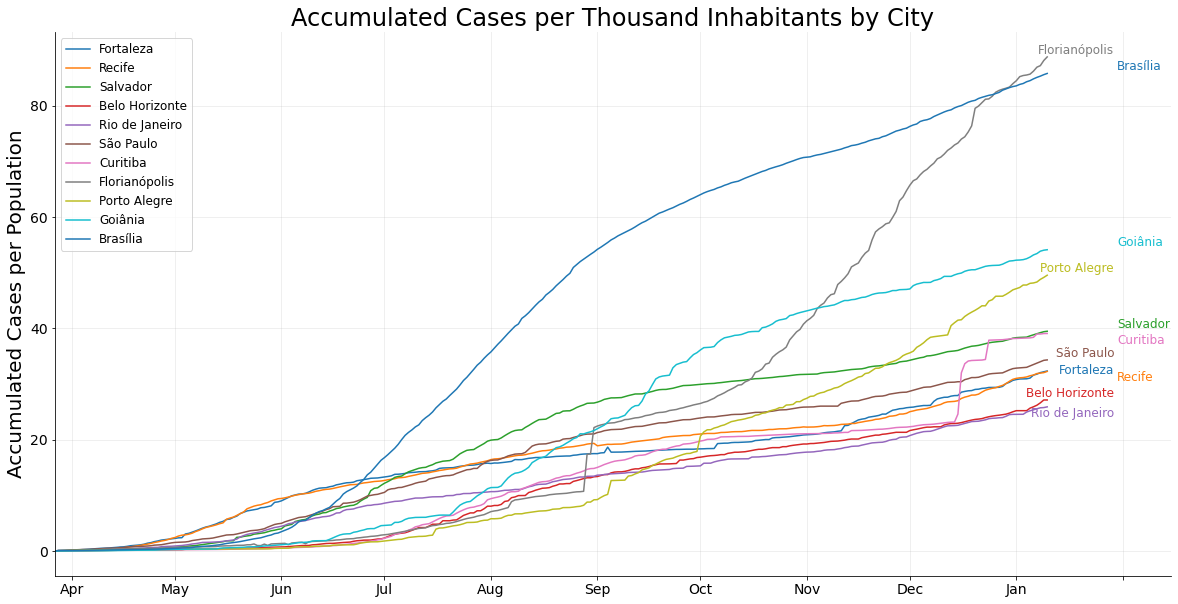

In [52]:
# infected per population
df_covidM['Cases_per_pop'] = (df_covidM['AccumulatedCases'] / df_covidM['Population']) * 1000

plt.figure(figsize=(20, 10))
ax = sns.lineplot(x='Date', y='Cases_per_pop', data=df_covidM, hue='City', palette=palette_dict)
ax.set_xticklabels(months_cities)
plt.legend(loc='upper left', fontsize=12)
ax.set_xlabel(None)
ax.set_ylabel('Accumulated Cases per Population')
ax.set_xlim(datetime.date(2020, 3, 27), datetime.date(2021, 2, 15))
plt.grid(alpha=0.2, linewidth=1)
plt.title('Accumulated Cases per Thousand Inhabitants by City');

# city names text
texts = [plt.text(pd.Timestamp("2021-1-30"), 
             df_covidM.loc[df_covidM['City'] == i, 'Cases_per_pop'][-1:].values[0], 
             i, 
             fontsize=12, 
             color=palette_dict[i]) for i in df_covidM['City'].unique()]

adjust_text(texts, autoalign='xy', only_move={'points':'xy', 'text':'y', 'objects': 'xy'}, precision=0.01, lim=10, force_text=(0.1, 0.25),
           force_points=(0.5, 0.03), force_objects=(0.4, 0.4), expand_text=(0.5, 0.8), expand_align=(1.05, 1.05));

As expected, Brasília is at the top of New Cases by 1,000 inhabitants second to Florianópolis only, both surpassing 80 infected per thousand people on January 10<sup>th</sup>. Florianópolis has a steep rise by the end of September and starting in October when it finally overtakes Brasília. Goiânia follows and by that same date falls short of 60 infected per 1,000 inhabitants.

Florianópolis makes a surprising appearance with almost 90 infected per 1,000 inhabitants. It is an island city with many touristic beaches and it shows signs of its population not respecting public policies for the pandemic, such as social distancing and mandatory wearing of mask.

Although São Paulo was the city with the most infected in total, Brasília and Florianópolis were the cities most affected by the virus when we consider the population of each city.

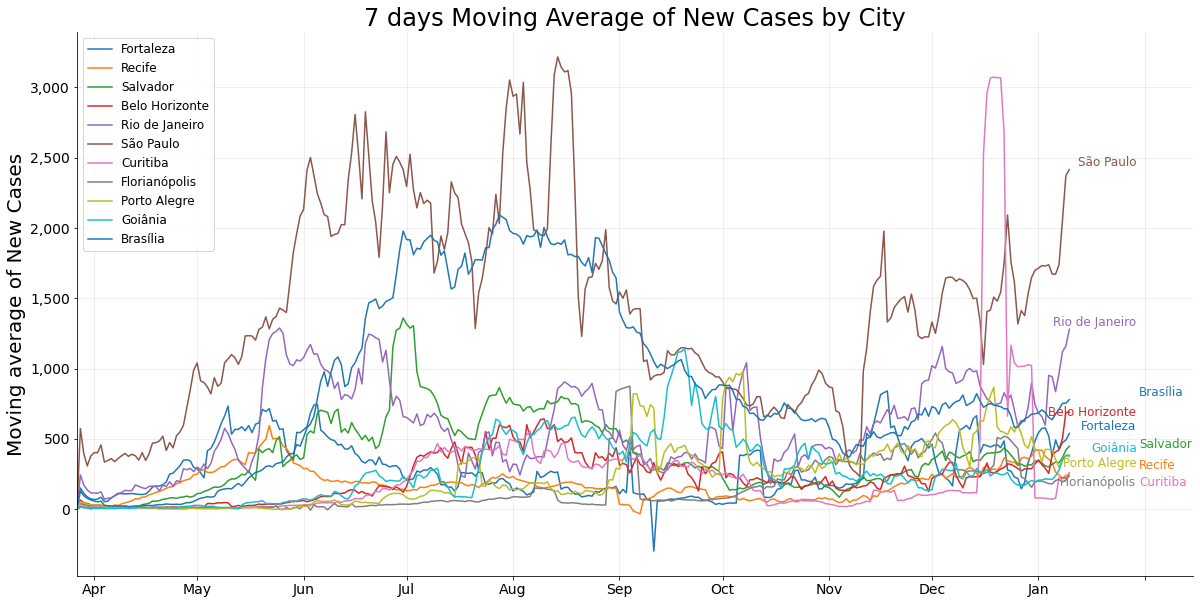

In [53]:
# 7 days moving average
df_covidM['mov_avgNC'] = df_covidM.groupby('City')['NewCases'].transform(lambda x: x.rolling(7, 1).mean())

plt.figure(figsize=(20, 10))
ax = sns.lineplot(x='Date', y='mov_avgNC', data=df_covidM, hue='City', palette=palette_dict)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_xticklabels(months_cities)
plt.legend(loc='upper left', fontsize=12)
ax.set_xlabel(None)
ax.set_ylabel('Moving average of New Cases')
ax.set_xlim(datetime.date(2020, 3, 27), datetime.date(2021, 2, 15))
plt.grid(alpha=0.2, linewidth=1)
plt.title('7 days Moving Average of New Cases by City');

# city names text
texts = [plt.text(pd.Timestamp("2021-1-30"), 
             df_covidM.loc[df_covidM['City'] == i, 'mov_avgNC'][-1:].values[0], 
             i, 
             fontsize=12, 
             color=palette_dict[i]) for i in df_covidM['City'].unique()]

adjust_text(texts, autoalign='xy', only_move={'points':'xy', 'text':'y', 'objects': 'xy'}, precision=0.01, lim=10, force_text=(0.1, 0.25),
           force_points=(0.5, 0.03), force_objects=(0.4, 0.4), expand_text=(0.5, 0.8), expand_align=(1.05, 1.05));

The pattern of New Cases dropping by October and November from the Brazil data can be seen here on every city, just as the second increase in cases that starts in November can as well. Other than that, the 7 days moving average is not sufficient to simplify or deseasonalize enough the cities series, as can be seen in the chaotic graph above.

São Paulo, Rio de Janeiro and Brasília are the cities with highest number of newly infected people per day and overall, as can be seen in the accumulated series graph above.

Some of the peaks in number of cases discussed previously can be seen here, such as the case for Curitiba (pink). New sources for this city and official data from Curitibas city hall do not share this behaviour. So it is believed that there was a miscommunication between this city and the Health Ministry, which aggregates data from all cities and was our source of COVID data.

Another anomaly is visible here in the form of negative values. Only a couple of occurrences are distinctly visible in the above graph in September 2020, for the cities Fortaleza and Recife.

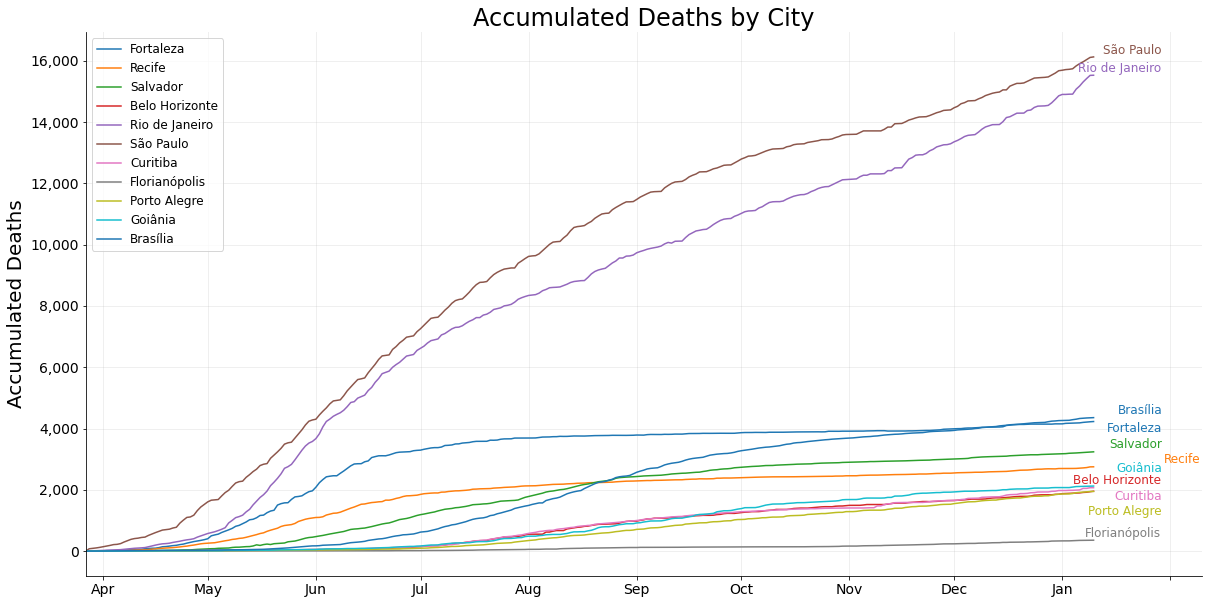

In [54]:
plt.figure(figsize=(20, 10))
ax = sns.lineplot(x='Date', y='AccumulatedDeaths', data=df_covidM, hue='City', palette=palette_dict)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_xticklabels(months_cities)
plt.legend(loc='upper left', fontsize=12)
ax.set_xlim(datetime.date(2020, 3, 27), datetime.date(2021, 2, 10))
ax.set_ylabel('Accumulated Deaths')
plt.grid(alpha=0.2, linewidth=1)
plt.xlabel(None)
plt.title('Accumulated Deaths by City');

# city names text
texts = [plt.text(pd.Timestamp("2021-1-30"), 
             df_covidM.loc[df_covidM['City'] == i, 'AccumulatedDeaths'][-1:].values[0], 
             i, 
             fontsize=12, 
             color=palette_dict[i]) for i in df_covidM['City'].unique()]

adjust_text(texts, autoalign='xy', only_move={'points':'xy', 'text':'y', 'objects': 'xy'}, precision=0.01, lim=10, force_text=(0.1, 1.15),
           force_points=(0.5, 0.03), force_objects=(0.4, 0.4), expand_text=(0.5, 0.9), expand_align=(1.05, 1.15));

Cities with most deaths were São Paulo and Rio de Janeiro with a considerable gap until other cities. Since Rio de Janeiro has roughly half the population of São Paulo, it is expected to be more affected by total population, in terms of registered deaths.

It may also be the case that since São Paulo and Rio de Janeiro are the biggest cities in Brazil, people from a wide area around these cities go there when in need of medical treatment. This would inflate the number of deaths being reported by them, while lowering deaths reported by other nearby cities. The latter effect doesn't necessarily apply to the cities being analyzed here, since they are at a fair distance from each other and are states' capitals.

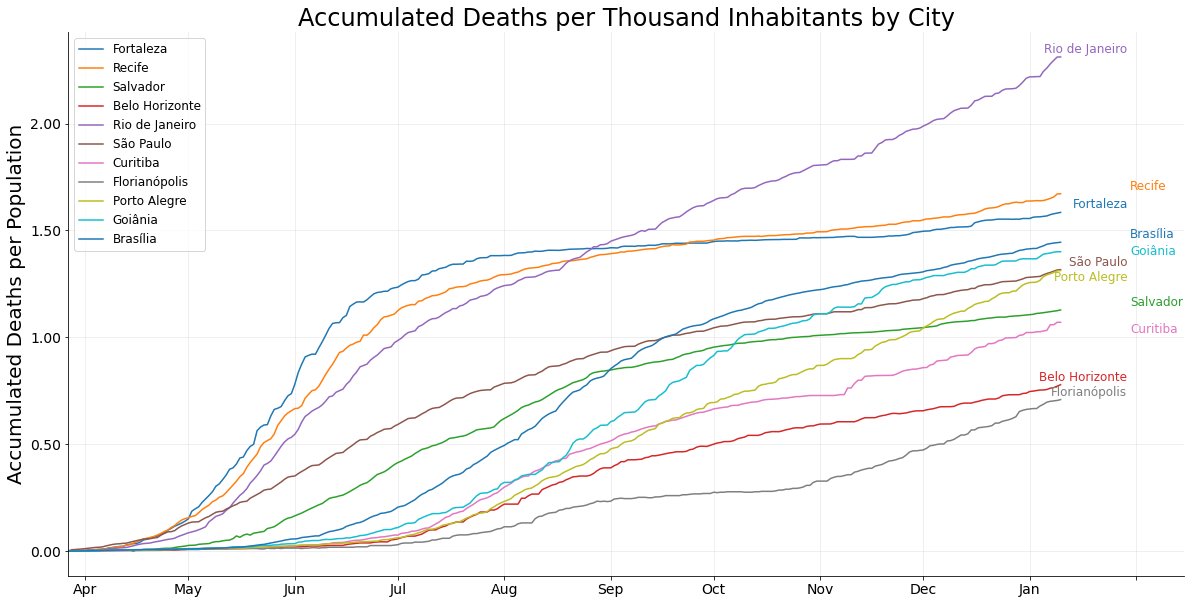

In [55]:
# deaths per population
df_covidM['Deaths_per_pop'] = (df_covidM['AccumulatedDeaths'] / df_covidM['Population']) * 1000

plt.figure(figsize=(20, 10))
ax = sns.lineplot(x='Date', y='Deaths_per_pop', data=df_covidM, hue='City', palette=palette_dict)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:.2f}'))
ax.set_xticklabels(months_cities)
plt.legend(loc='upper left', fontsize=12)
ax.set_xlabel(None)
ax.set_ylabel('Accumulated Deaths per Population')
ax.set_xlim(datetime.date(2020, 3, 27), datetime.date(2021, 2, 15))
plt.grid(alpha=0.2, linewidth=1)
plt.title('Accumulated Deaths per Thousand Inhabitants by City');

# city names text
texts = [plt.text(pd.Timestamp("2021-1-30"), 
             df_covidM.loc[df_covidM['City'] == i, 'Deaths_per_pop'][-1:].values[0], 
             i, 
             fontsize=12, 
             color=palette_dict[i]) for i in df_covidM['City'].unique()]

adjust_text(texts, autoalign='xy', only_move={'points':'xy', 'text':'y', 'objects': 'xy'}, precision=0.01, lim=10, force_text=(0.1, 0.25),
           force_points=(0.5, 0.3), force_objects=(0.4, 0.4), expand_text=(0.5, 0.8), expand_align=(1.05, 1.05));

Rio de Janeiro, Recife and Fortaleza were most affected by the virus in terms of number of Deaths by 1,000 inhabitants. By December, Rio de Janeiro crossed the 2 deaths by 1,000 inhabitants line. Florianópolis is the least affected both in total deaths as in deaths by population.

Brasília, Florianópolis and Goiânia were the cities most affected in terms of cases per population. Meanwhile, Rio de Janeiro, Recife and Fortaleza were the most affected in terms of deaths per population. The former 3 are more likely to have lower mortality rates and the last 3 are more likely to have higher mortality rates. Further down, mortality rates between cities are analyzed.

The 2 cities with most infected per thousand inhabitants are Florianópolis and Brasília, but the same is not true for the above graph showing deaths per thousand inhabitants. This relationship between both variables can be visualizes in the form of mortality rates, as shown further below. Therefore, Florianópolis and Brasília are cities with low mortality rates and this can be an indicator of high quality health care systems in both cities, at least in terms of response to the pandemic.

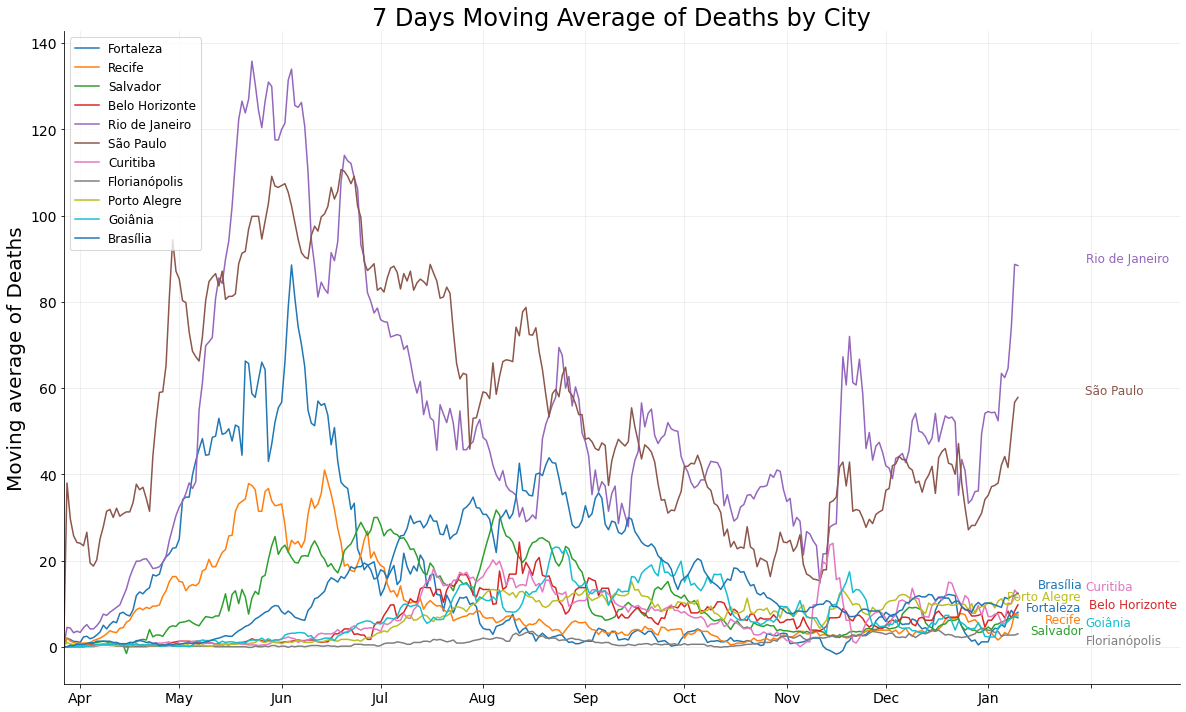

In [56]:
# 7 days moving average
df_covidM['mov_avgD'] = df_covidM.groupby('City')['Deaths'].transform(lambda x: x.rolling(7, 1).mean())

plt.figure(figsize=(20, 12))
ax = sns.lineplot(x='Date', y='mov_avgD', data=df_covidM, hue='City', palette=palette_dict)
ax.set_xticklabels(months_cities)
plt.legend(loc='upper left', fontsize=12)
ax.set_ylabel('Moving average of Deaths')
ax.set_xlim(datetime.date(2020, 3, 27), datetime.date(2021, 2, 28))
plt.xlabel(None)
plt.grid(alpha=0.2, linewidth=1)
plt.title('7 Days Moving Average of Deaths by City');

# city names text
texts = [plt.text(pd.Timestamp("2021-1-30"), 
             df_covidM.loc[df_covidM['City'] == i, 'mov_avgD'][-1:].values[0], 
             i, 
             fontsize=12, 
             color=palette_dict[i]) for i in df_covidM['City'].unique()]

adjust_text(texts, autoalign='xy', only_move={'points':'xy', 'text':'y', 'objects': 'xy'}, precision=0.01, lim=10, force_text=(0.1, 0.55),
           force_points=(0.8, 0.03), force_objects=(0.8, 0.4), expand_text=(0.5, 0.9), expand_align=(1.05, 1.25));

The moving average graph for Deaths above shows São Paulo and Rio de Janeiro with the highest numbers accordingly. Other cities are at a controlled period for deaths by January 2021, even though most of them were above the 20 daily death on average at some point.

It is also worth noting how some cities were late in observing death by the virus (or in starting to correctly classify COVID deaths or even in reporting them correctly). By the time São Paulo and Rio de Janeiro are reaching their all time peak in daily death, a few cities are just beginning to see a raise in this attribute. Brazil is a very large country and this illustrates how they can be affected by the pandemic differently, having months of disparity between cities trends.

The graph is chaotic just as the daily cases graph. Calculating the 7 days moving average for both series is not enough to remove cyclical components and randomness, which do not necessarily represent a behaviour in deaths, as when the deaths are reported and when the data is sent to the Healh Ministry are also relevant factors that influence the shape of the series.

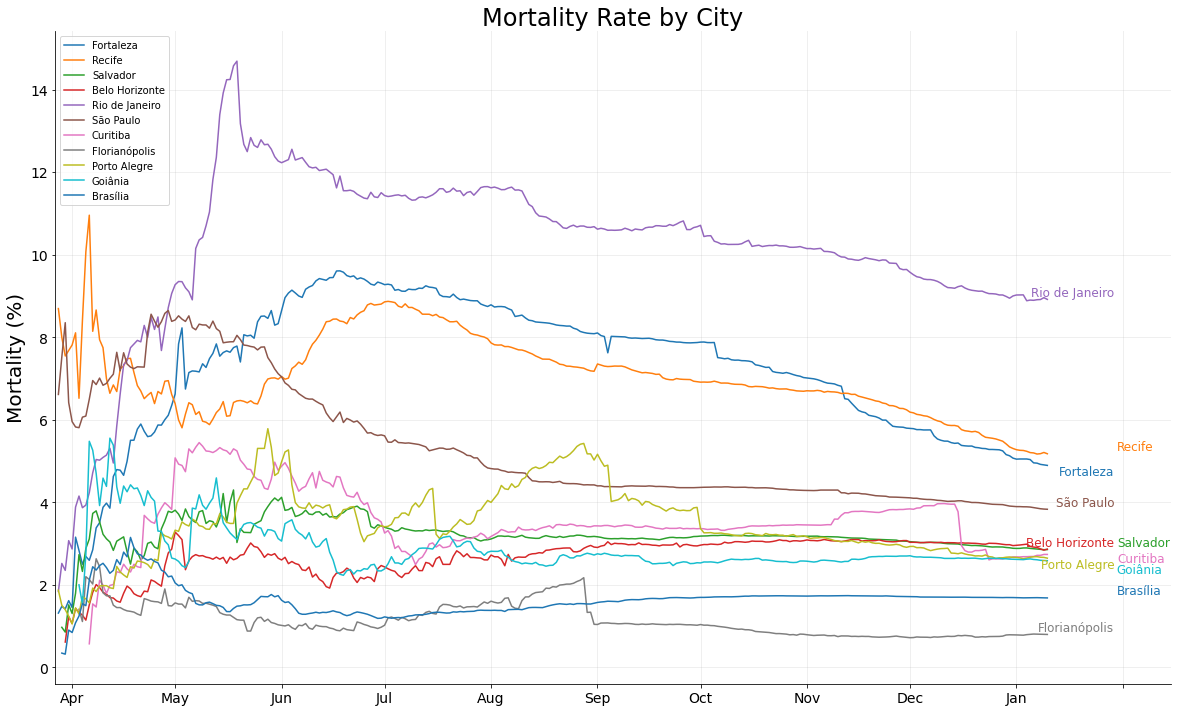

In [57]:
# mortality analysis
df_mortM = df_covidM[df_covidM['AccumulatedDeaths'] != 0].copy()
df_mortM['Mortality'] = (df_mortM['AccumulatedDeaths'] / df_mortM['AccumulatedCases']) * 100

plt.figure(figsize=(20, 12))
ax = sns.lineplot(x='Date', y='Mortality', data=df_mortM[df_mortM['Mortality'] < 400], hue='City', palette=palette_dict) # filtered mortality rate
plt.grid(alpha=0.2, linewidth=1)
plt.title('Mortality Rate by City')
plt.ylabel('Mortality (%)')
plt.xlabel(None)
ax.set_xticklabels(months_cities)
plt.legend(loc='upper left', fontsize=10)
ax.set_xlim(datetime.date(2020, 3, 27), datetime.date(2021, 2, 15));

# city names text
texts = [plt.text(pd.Timestamp("2021-1-30"), 
             df_mortM.loc[df_mortM['City'] == i, 'Mortality'][-1:].values[0], 
             i, 
             fontsize=12, 
             color=palette_dict[i]) for i in df_covidM['City'].unique()]

adjust_text(texts, autoalign='xy', only_move={'points':'xy', 'text':'y', 'objects': 'xy'}, precision=0.01, lim=10, force_text=(0.1, 0.25),
           force_points=(0.5, 0.03), force_objects=(0.4, 0.4), expand_text=(0.5, 0.8), expand_align=(1.05, 1.05));

Mortality rate for Recife was filtered out on March 31<sup>st</sup>. On this day, Recife had only 1 accumulated case but 4 accumulated deaths. This is an inconsistency caused by negative values being present in the data.

Mortality rate on Brazil starts to stabilize near July. On this month forward, Rio de Janeiro, Fortaleza and Recife have the highest mortality rates between the 11 cities, in accordance with prior prediction. These 3 cities are located on beaches and although the virus does not spread well in open areas, beaches in Brazil overall were being highly populated during most of the pandemic, except when people were being forced to leave by authorities.

Rio de Janeiro is once again on the top, having mortality rates of over 10% during most of the above shown period. It is the city most affected overall by the pandemic, when analyzing deaths and mortality. Brasília and Florianópolis were the most impacted in terms of cases per thousand inhabitants and São Paulo in terms of total cases and deaths. The 4 cities mentioned in this paragraph make for interesting focus points when analyzing the impact of the pandemic on the housing market, being at the top of different variables on the previous graphs. Along with these 4 cities, Belo Horizonte can be taken as a reference point since for most variables, it has a well behaved curve and is near the bottom compared to other cities.

The 5 selected cities were used for prediction of housing data.

In [58]:
df_covidM.head()

Region Estate       City  ...   mov_avgNC Deaths_per_pop  mov_avgD
0  Nordeste     CE  Fortaleza  ...    0.000000       0.000000  0.000000
1  Nordeste     CE  Fortaleza  ...  152.000000       0.001498  2.000000
2  Nordeste     CE  Fortaleza  ...  112.666667       0.001873  1.666667
3  Nordeste     CE  Fortaleza  ...   88.250000       0.001873  1.250000
4  Nordeste     CE  Fortaleza  ...   74.200000       0.002248  1.200000

[5 rows x 15 columns]

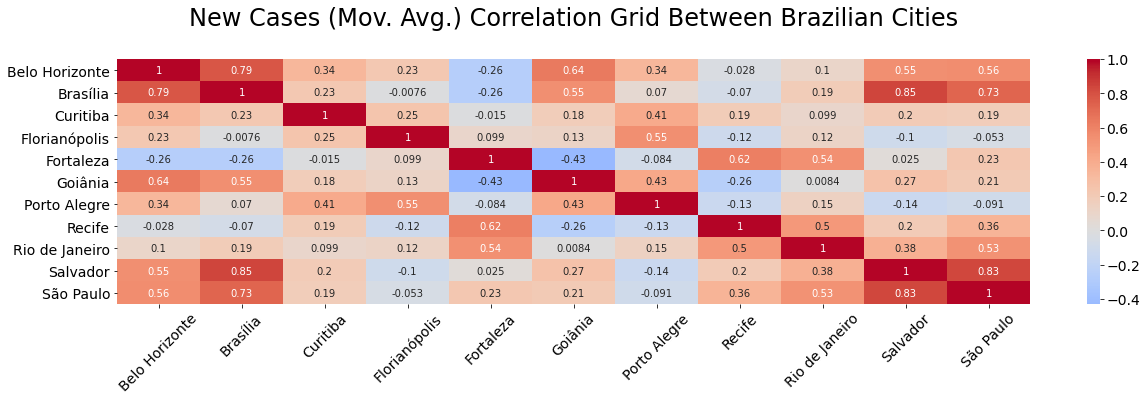

In [59]:
# new cases correlation
df_cities_corrNC = df_covidM.pivot(columns='City', values='mov_avgNC', index='Date')

plt.figure(figsize=(18, 6))
ax = sns.heatmap(df_cities_corrNC.corr(), cmap='coolwarm', annot=True, center=0)
plt.title('New Cases (Mov. Avg.) Correlation Grid Between Brazilian Cities\n')
plt.xticks(rotation=45)
plt.tight_layout()
plt.xlabel(None)
plt.ylabel(None);

The correlation plot above presents how cities correlate with each other for the 7 days moving average of new cases.

Most of the cities do not correlate in number of new cases, neither positively nor negatively. To evaluate how strong a correlation is, the following intervals for the correlation coefficient $c$ can be used:

- $ \;0.7 < |c| \le 1.0$ - strong correlation
- $ \;0.4 < |c| \le 0.7$ - moderate correlation
- $ \;0.0 \le |c| \le 0.4$ - weak or no correlation

Cities pairs that correlated the most were (in order) Salvador and Brasília (0.85), Salvador and São Paulo (0.83), Salvador and São Paulo (0.55), Brasília and Belo Horizonte (0.79) and Brasília and São Paulo (0.73). Meanwhile, the strongest negative correlation was between Fortaleza and Goiânia (0.43). The strong correlation implies new cases between each city pair accompany each other, but not necessarily that one causes the other.

Most cities not being highly correlated reinforces the hypothesis that the pandemic was not uniform throughout Brazil, and that different cities were affected differently.

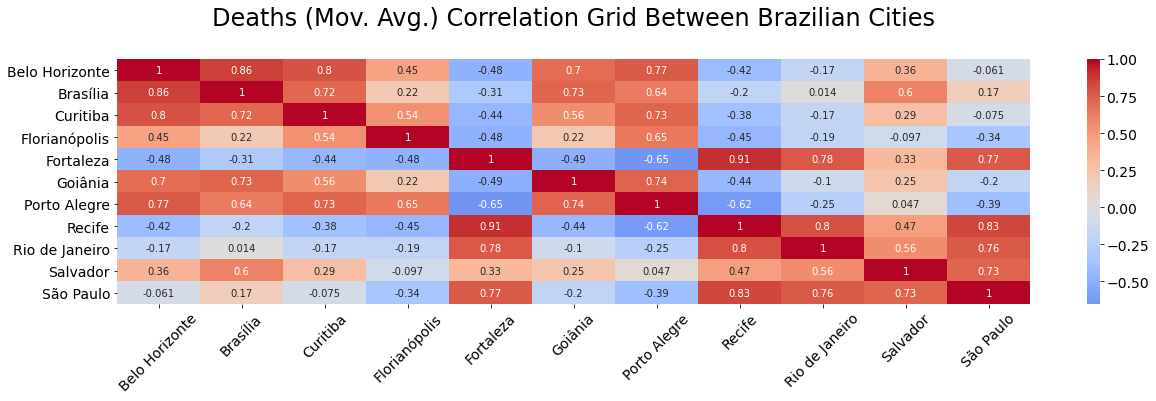

In [60]:
# deaths correlation
df_cities_corrD = df_covidM.pivot(columns='City', values='mov_avgD', index='Date')

plt.figure(figsize=(18, 6))
ax = sns.heatmap(df_cities_corrD.corr(), cmap='coolwarm', annot=True, center=0)
plt.title('Deaths (Mov. Avg.) Correlation Grid Between Brazilian Cities\n')
plt.xticks(rotation=45)
plt.tight_layout()
plt.xlabel(None)
plt.ylabel(None);

Deaths correlation heatmap is slightly similar to the new cases one, only correlations are stronger (closer to -1 or 1) in general. There are still no strong negative correlations although there are more moderate ones, and there are significantly more strong positive correlations.

The strong positive correlations for new cases are still present and similar in magnitude for deaths, with the exception of Brasília and São Paulo (0.73 for cases and 0.17 for deaths). The 7 days moving average for deaths is more common to share its behavior between cities.

While new cases can be explained by lockdown and other measures from the government, and from how well the population is respecting recommendations such as social distancing, Deaths by COVID not only follows cases with a delay but can also be explained by the quality of the health care in a city, hospital bed capacity and occupancy, respirators availability and other factors.

Considering all the variables that can affect number of deaths and that most city pairs do not share a strong correlation, further analysis or use of each series in building models would have to be done separately for each city. There are a few exceptions for this, such as Belo Horizonte and Brasília, which have a strong positive correlation in both series.

## Housing analysis:

Real Estate data represents averages of all listings for each city. The column *Average Residential Rent /m2* represents the average price per squared meters for all properties in each city that the data owner has access to. The same applies for other columns with average in the name. There is one data entry per month, which limits the ability to extract insights and to use it to develop machine learning models. Rentability columns are approximately the rent value divided by the sale value for each date, and indicates how much of the property overall value is paid by one month of rent.

The average values are in Reais, Brazils currency. 1 US dollars is equivalent to approximately 5.1 Reais in mid December 2020.

In [61]:
# first 5 rows of the housing dataset
df_imob.head()

Date  Average Residential Sale /m2  ...  Comercial Rentability       City
0 2008-01-01                   2612.011801  ...                    NaN  São Paulo
1 2008-02-01                   2632.848443  ...                    NaN  São Paulo
2 2008-03-01                   2668.657598  ...                    NaN  São Paulo
3 2008-04-01                   2715.323408  ...                    NaN  São Paulo
4 2008-05-01                   2760.406620  ...                    NaN  São Paulo

[5 rows x 8 columns]

In [62]:
# information on column data types and missing vlaues
df_imob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716 entries, 0 to 1715
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date                          1716 non-null   datetime64[ns]
 1   Average Residential Sale /m2  1354 non-null   float64       
 2   Average Residential Rent /m2  906 non-null    float64       
 3   Residential Rentability       901 non-null    float64       
 4   Average Comercial Sale /m2    498 non-null    float64       
 5   Average Comercial Rent /m2    498 non-null    float64       
 6   Comercial Rentability         496 non-null    float64       
 7   City                          1716 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 107.4+ KB


Comercial data is sparse, having only 496-498 non-missing values. For this reason, only residencial data was considered.

In [63]:
# drop columns of comercial data
df_imob.drop(columns=['Average Comercial Sale /m2', 'Average Comercial Rent /m2', 'Comercial Rentability'], inplace=True)
df_imob.head()

Date  Average Residential Sale /m2  ...  Residential Rentability       City
0 2008-01-01                   2612.011801  ...                 0.007135  São Paulo
1 2008-02-01                   2632.848443  ...                 0.007253  São Paulo
2 2008-03-01                   2668.657598  ...                 0.007399  São Paulo
3 2008-04-01                   2715.323408  ...                 0.007569  São Paulo
4 2008-05-01                   2760.406620  ...                 0.007685  São Paulo

[5 rows x 5 columns]

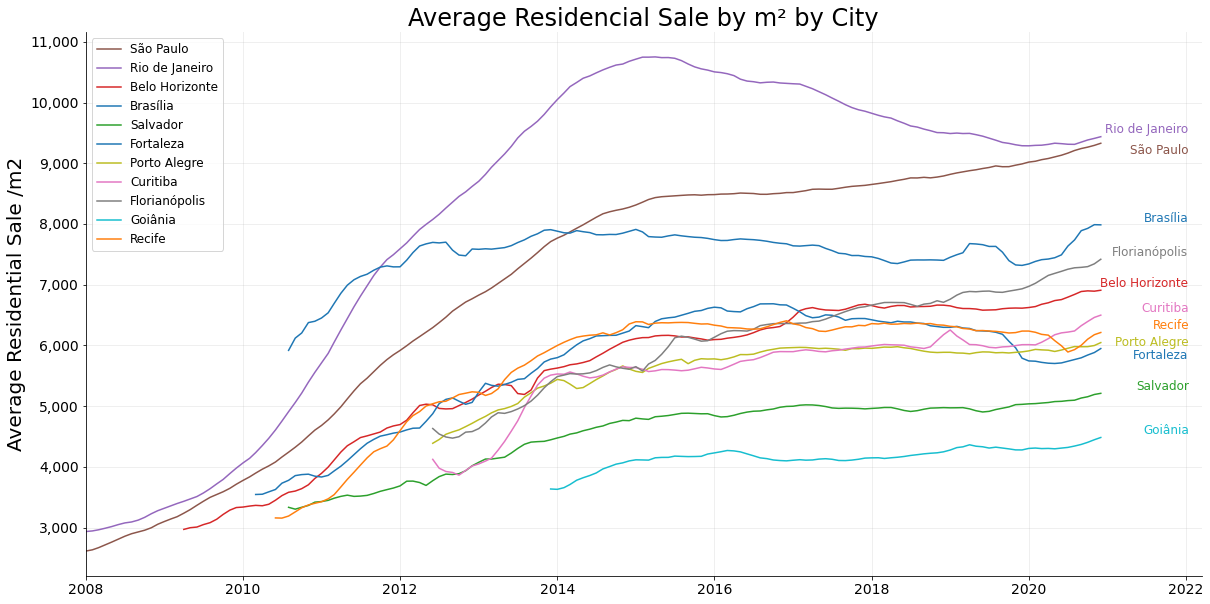

In [64]:
plt.figure(figsize=(20, 10))
ax = sns.lineplot(x='Date', y='Average Residential Sale /m2', data=df_imob, hue='City', palette=palette_dict)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.legend(loc='upper left', fontsize=12)
plt.grid(alpha=0.2, linewidth=1)
plt.title('Average Residencial Sale by m² by City')
plt.xlabel(None)
ax.set_xlim(datetime.date(2008, 1, 1), datetime.date(2022, 3, 15));

# city names text
texts = [plt.text(pd.Timestamp("2022-1-20"), 
             df_imob.loc[df_imob['City'] == i, 'Average Residential Sale /m2'][-1:].values[0], 
             i, 
             fontsize=12, 
             color=palette_dict[i]) for i in df_covidM['City'].unique()]

adjust_text(texts, autoalign='xy', only_move={'points':'xy', 'text':'y', 'objects': 'xy'}, precision=0.01, lim=10, force_text=(0.1, 0.25),
           force_points=(0.5, 0.03), force_objects=(0.4, 0.4), expand_text=(0.5, 0.8), expand_align=(1.05, 1.05));

From the above graph it is visible how cities have data beggining in different dates. Rio de Janeiro is the most expensive city among the 11 to buy a residential property, followed closely by São Paulo, and Brasília comes in third. Those are the 3 most populated cities in Brazil, so it makes sense that rent values would be higher.

Florianópolis, being a touristic hotspot and a city with high cost of life in general, also appears with the fourth highest sale prices. Goiânia has the lowest prices for houses per squared meters, at around half the values for São Paulo and rio de janeiro. It is also the last city to be included and have data available, which makes sense as low prices might not be ideal for a profitable business.

There is an upward trend observed in 2020 for all cities. This is a first observation of the plausible effects of the pandemic on this market, and an initial hypothesis would be that the pandemic caused a rise in sale prices in 2020.

In [65]:
# descriptive statistics of residential attributes
pd.DataFrame(df_imob.describe())

Average Residential Sale /m2  ...  Residential Rentability
count                   1354.000000  ...               901.000000
mean                    6087.190318  ...                 0.003945
std                     1749.753240  ...                 0.000877
min                     2612.011801  ...                 0.002611
25%                     4875.614842  ...                 0.003286
50%                     5975.592490  ...                 0.003841
75%                     6897.406396  ...                 0.004303
max                    10751.481885  ...                 0.007697

[8 rows x 3 columns]

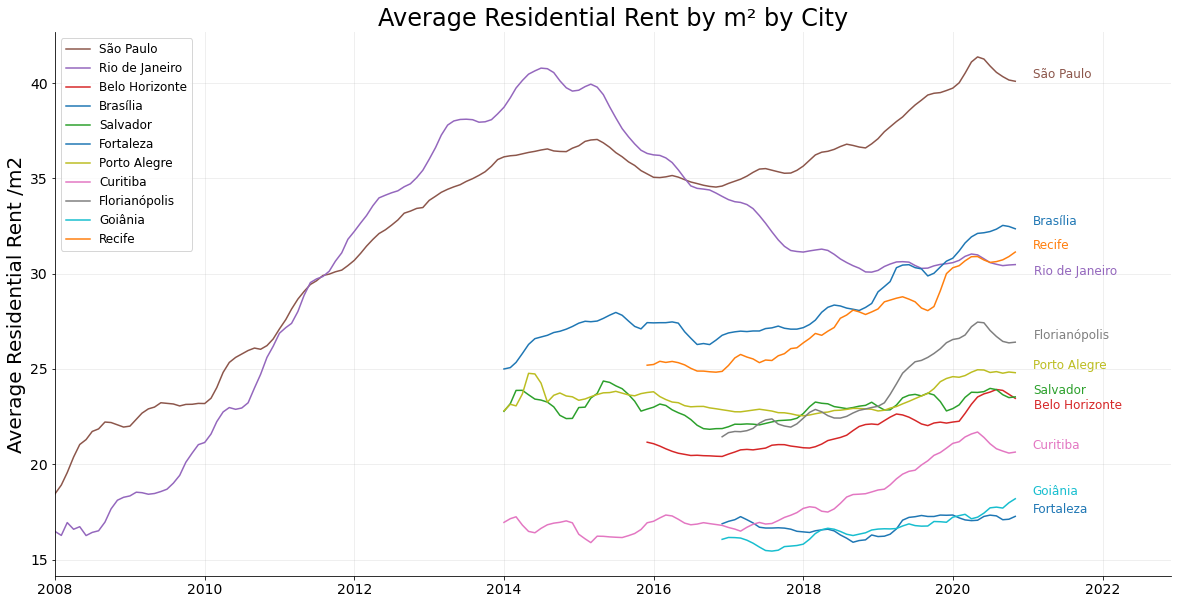

In [66]:
plt.figure(figsize=(20, 10))
ax = sns.lineplot(x='Date', y='Average Residential Rent /m2', data=df_imob, hue='City', palette=palette_dict)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.legend(loc='upper left', fontsize=12)
plt.grid(alpha=0.2, linewidth=1)
ax.set_xlim(datetime.date(2008, 1, 1), datetime.date(2022, 12, 1))
plt.xlabel(None)
plt.title('Average Residential Rent by m² by City');

# city names text
texts = [plt.text(pd.Timestamp("2021-1-20"), 
             df_imob.loc[df_imob['City'] == i, 'Average Residential Rent /m2'][-2:-1].values[0], 
             i, 
             fontsize=12, 
             color=palette_dict[i]) for i in df_covidM['City'].unique()]

adjust_text(texts, autoalign='xy', only_move={'points':'xy', 'text':'y', 'objects': 'xy'}, precision=0.01, lim=10, force_text=(0.1, 0.25),
           force_points=(0.5, 0.03), force_objects=(0.4, 0.4), expand_text=(0.1, 0.8), expand_align=(1.05, 1.05));

Residential rent data is even more incomplete in comparisson with residential sale. São Paulo is on top with a considerable gap until the following cities, Brasília and Recife. In 2020, Recife passes Rio de Janeiro, which leads in terms of sale prices.

São Paulo maintains a high price in comparisson with other cities both for rent and for sale with over 40 Reais per m² by the end of the data. Rio de janeiro leads in sale prices but comes fourth in rent prices. Another city that shares this behavior is Fortaleza, with sale prices higher than Salvador and Goiânia only, but comes in last in rent prices dropping below Goiânia.

There is not a clear trend present in all cities like there was for sale prices in 2020. Some cities like São Paulo, Florianópolis and Curitiba share similar pattern, ceasing the rise in rent prices followed by a drop in 2020. Other cities like Goiânia kept rising in rent prices, with a slight accentuation in the same year.

Lastly, rentability was plotted by city.

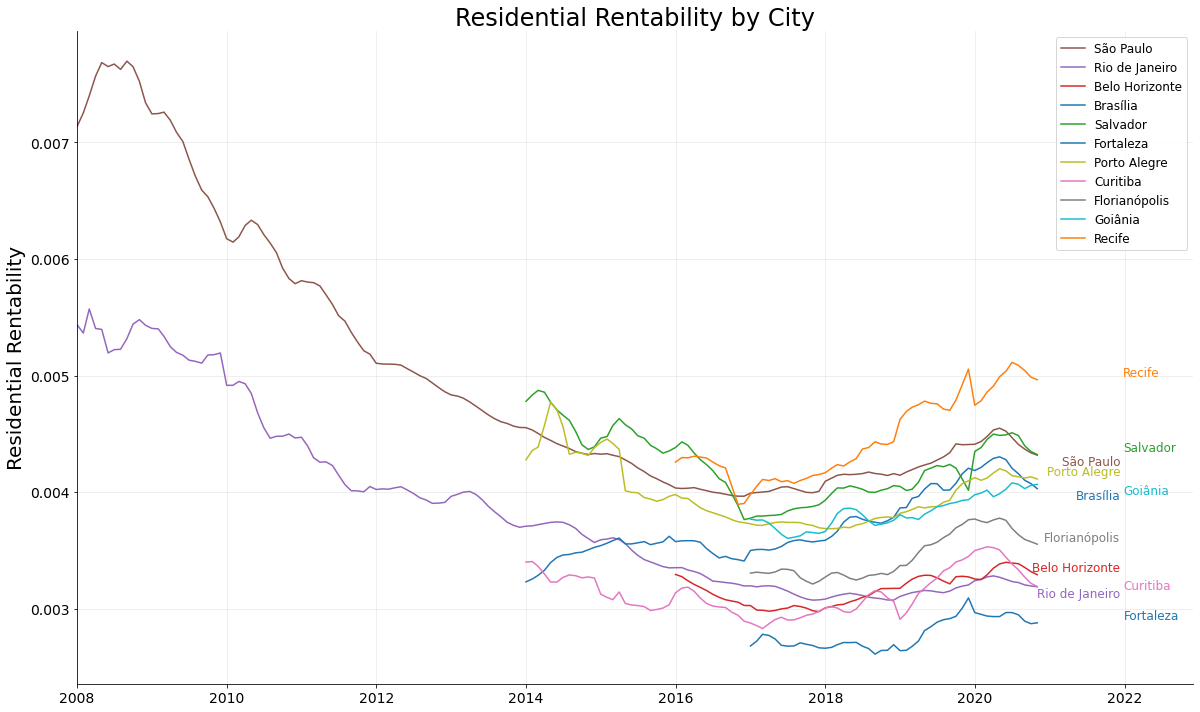

In [67]:
plt.figure(figsize=(20, 12))
ax = sns.lineplot(x='Date', y='Residential Rentability', data=df_imob, hue='City', palette=palette_dict)
plt.legend(loc='upper right', fontsize=12)
plt.grid(alpha=0.2, linewidth=1)
plt.xlabel(None)
ax.set_xlim(datetime.date(2008, 1, 1), datetime.date(2022, 12, 1))
plt.title('Residential Rentability by City');

# city names text
texts = [plt.text(pd.Timestamp("2021-12-20"), 
             df_imob.loc[df_imob['City'] == i, 'Residential Rentability'][-2:-1].values[0], 
             i, 
             fontsize=12, 
             color=palette_dict[i]) for i in df_covidM['City'].unique()]

adjust_text(texts, autoalign='xy', only_move={'points':'xy', 'text':'y', 'objects': 'xy'}, precision=0.01, lim=10, force_text=(0.1, 0.55),
           force_points=(0.5, 0.03), force_objects=(0.4, 0.4), expand_text=(0.1, 0.8), expand_align=(1.05, 1.05));

Rentability is the percentage of the value of the property that the rent is worth. A rentability of 1% means that the rent price is equivalent to 1% of the total value of the property. In 2020, values for the 11 cities were mostly below 0.5% and at this rate, the landlord would need to wait for 200 months (16.7 years) worth of rent to have a full return of the value of the property. If rentability goes down to 0.3%, the wait time for a full return on investment goes up to almost 28 years. This is not considering any taxes or any further discounts on the rent value, as well as inflation and other external factors.

The best cities to invest in real estate in 2020 would be Recife, Salvador and São Paulo. Rentability also contains a considerable amout of missing values, since it depends on rent values, which are also sparse.

For most cities there is a clear pattern in 2020 of rentability going down after rising since around 2019. This is a reflection of the sale and rent prices, as rentability is calculated from these series.

São Paulo was chosen for correlation analysis between rent and sale values.

<Figure size 1800x1080 with 0 Axes>

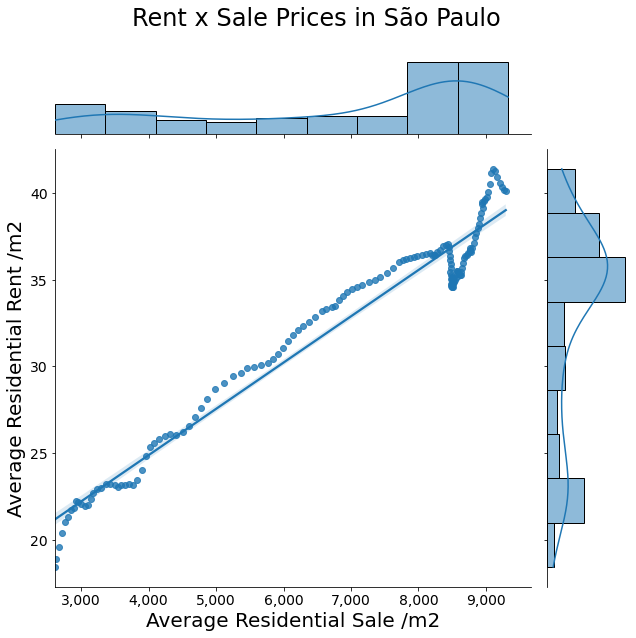


Pearson correlation coefficient: 0.774



In [68]:
# correlation between new cases and deaths
# automatic generation of regression line and 95% confidence interval zone
plt.figure(figsize=(25, 15))
ax = sns.jointplot(x='Average Residential Sale /m2', y='Average Residential Rent /m2', data=df_imob[df_imob['City'] == 'São Paulo'], height=9, kind='reg')
ax.ax_joint.get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.fig.suptitle('Rent x Sale Prices in São Paulo', fontsize=24)
ax.fig.subplots_adjust(top=0.90)
plt.ylabel('Average Residential Rent /m2')
plt.xlabel('Average Residential Sale /m2')
plt.show();

# correlation coefficient
corr_rent_sale = df_imob['Average Residential Sale /m2'].corr(df_imob['Average Residential Rent /m2'])
print (f'\nPearson correlation coefficient: {corr_rent_sale:.3f}\n')

The above graph correlates Rent and Sale prices in São Paulo. The correlation coefficient of 0.774 indicates a strong correlation between both. In the middle of the graph there is a regression line inside a 95% confidence interval zone. On the top and on the right lies the histograms for each variable with a KDE curve overlapping.

From the histograms, São Paulo has most commonly sale prices of around 8 and 9 thousand Reais and rent prices most commonly between 35 and 40 Reais, per m².

The correlation coefficient informs that it is not always the case that an increase in sale price is accompanied by an increase in rent price, and vice-versa.

Following are the correlation heatmaps between the analyzed cities for each sale and rent series. Only data since 2017 for rent was analyzed, since there are missing values for some cities which alter the coefficients, and for sale data since 2015 (all cities have sale data from 2015 onwards).

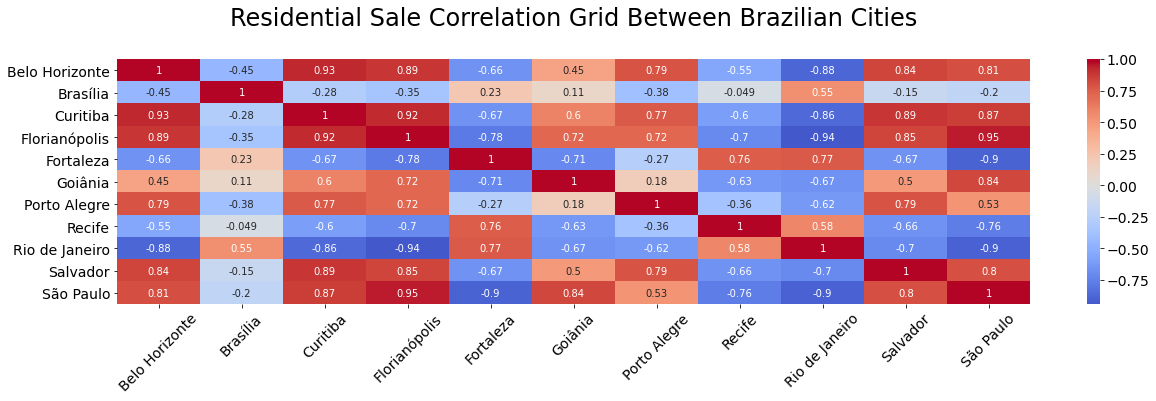

In [69]:
# sale correlation
sale_corr = df_imob[df_imob['Date'] > '2015-01-01'].pivot(columns='City', values='Average Residential Sale /m2', index='Date')

plt.figure(figsize=(18, 6))
ax = sns.heatmap(sale_corr.corr(), cmap='coolwarm', annot=True, center=0)
plt.title('Residential Sale Correlation Grid Between Brazilian Cities\n')
plt.xticks(rotation=45)
plt.tight_layout()
plt.xlabel(None)
plt.ylabel(None);

There are a lot of strong and moderate correlations present in the sale series. This indicates that cities sale prices are very common to accompany each other, but also that it is very common for cities to have the opposite behavior.

Rio de Janeiro is the city with most negative correlations, most of which are strong. Brasília is the city with the weakest correlations and can be considered a city with a unique economy, that isn't affected by housing prices in other parts of the country. 

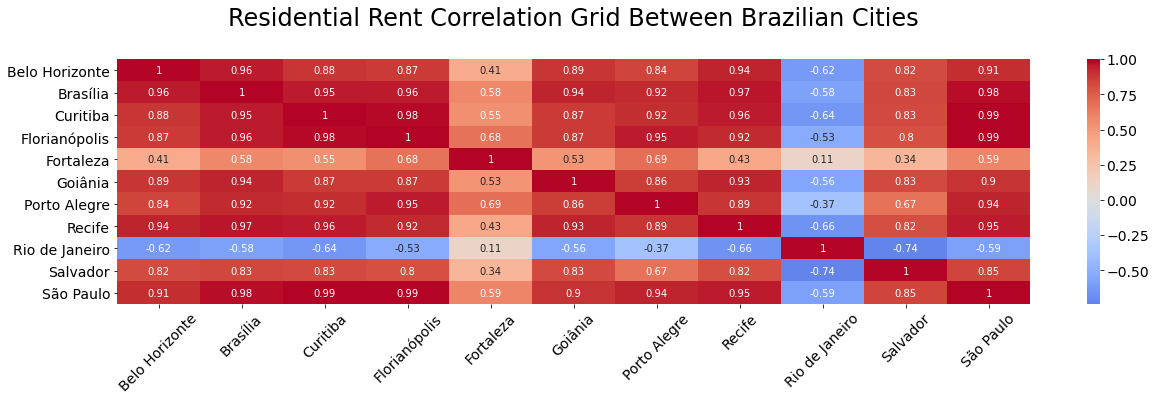

In [70]:
# rent correlation
rent_corr = df_imob[df_imob['Date'] > '2017-01-01'].pivot(columns='City', values='Average Residential Rent /m2', index='Date')

plt.figure(figsize=(18, 6))
ax = sns.heatmap(rent_corr.corr(), cmap='coolwarm', annot=True, center=0)
plt.title('Residential Rent Correlation Grid Between Brazilian Cities\n')
plt.xticks(rotation=45)
plt.tight_layout()
plt.xlabel(None)
plt.ylabel(None);

The rent heatmap reveals that prices are all highly correlated between most combination of cities. The exception being once again Rio de janeiro, and Fortaleza. All other cities have similar rent series with strong positive correlations, as visible from the mostly red and dark orange graph.

Some cases where the correlation is not high (light orange, white and light blue colors) can be representative of local economic factors.

When analyzing and creating models for predictions, it is expected to reach results very similar for the rent series and more varied for the sale series.

## COVID-19 vs. Housing

Correlation analysis between COVID and housing data was made in the last three pages of the Power BI report, where line plots and scatter plots can be filtered by date range and city. On the Medium post, it is also presented in the form of a correlation coefficient table.

# End of Part 1


Thank you for reading. This concludes the first of two parts for this project. Below is a small preview of what is to come. It is still under construction, so it might radically change until it is published.

Once again, feel free to contact us for questions, suggestions and comments. As aspiring data scientists and data analysts, we would love to receive feedback.

# Preview:

# The Effect of The Pandemic on The Housing Market

To analyze the effect of COVID-19 on real estate market, correlating data is not enough for the fact that correlation does not imply causation. Since it is not possible to elaborate an experiment isolating variables that might affect this effect, another solution was required to be able to extract this information.

The goal of this analysis is to create statistical models to predict what would the behaviour of real estate market be if there was no pandemic. For this, sale and rent data up to the beginning of 2020 was used to predict data until the end of this year. This predicted data was then compared with the actual real estate data available. If significant differences in behaviour were to be observed the conclusion would be that the pandemic had an effect on the real estate market, and vice-versa.

This approach is flawed by not excluding all possible extraneous variables that might have an influence on the dependent variable, as well as forecasting economical market. Forecasting for any market is generally extremely complex, as it involves numerous variables and external factors that can affect prices. Therefore, results obtained on this project should not be considered as an accurate representation of reality, this project was made for educational puposes only.

The search for the model that best generalizes the housing data was made for sales and rent data for each city separately. 

## Time series

Time series can be split into 4 components:
- Trend: overall trend of the series, despite repeating patterns
- Seasonality: regular patterns over a period of time
- Cyclic: repeating patterns that do not follow an interval in time and can vary in length
- Noise: random component, white noise, error or irregular data

To exemplify this, the statsmodels library can conveniently decompose a time series such as new cases in Brazil using multiplicative and additive decomposition.

In [71]:
# import library
from statsmodels.tsa.seasonal import seasonal_decompose

An error in the COVID-19 dataset was found during the decomposition process, the date December 24 of 2020 had 2 entries. The second entry had no new values foi daily cases and deaths and accumulated values remained the same. Although the data was inspected for missing values, it was not for duplicated values. This oversight was unnoticeable on earlier graphs, as it was small enough to not alter the results and analysis.

As such, the 3 main datasets were checked for duplicated values before giving sequence to the decomposition.

In [72]:
# prints dates with more than 1 occurences
print ('Brazil data duplicated dates:', df_covidBR['Date'].value_counts()[df_covidBR['Date'].value_counts() > 1])
# prints dates with more than 11 occurences, for each of the 11 cities
print ('Cities data duplicated dates:', df_covidBR['Date'].value_counts()[df_covidBR['Date'].value_counts() > 11])
# prints dates with more than 11 occurences, for each of the 11 cities
print ('Housing cities data duplicated dates:', df_imob['Date'].value_counts()[df_imob['Date'].value_counts() > 11])

Brazil data duplicated dates: 2020-12-24    2
Name: Date, dtype: int64
Cities data duplicated dates: Series([], Name: Date, dtype: int64)
Housing cities data duplicated dates: Series([], Name: Date, dtype: int64)


The only duplicated date is the one on Christmas Eve for Brazil COVID-19 data. Below this duplicated date is removed and the decomposition can be done.

In [73]:
# checks for the index of the second day 24
print (df_covidBR[df_covidBR['Date'] == '2020-12-24']['Date'])

# removes index 304 from dataset and resets index
df_covidBR.drop(304, axis=0, inplace=True)
df_covidBR.reset_index(drop=True, inplace=True)

# checks again for duplicated dates
print ('Brazil data duplicated dates:', df_covidBR['Date'].value_counts()[df_covidBR['Date'].value_counts() > 1])

303   2020-12-24
304   2020-12-24
Name: Date, dtype: datetime64[ns]
Brazil data duplicated dates: Series([], Name: Date, dtype: int64)


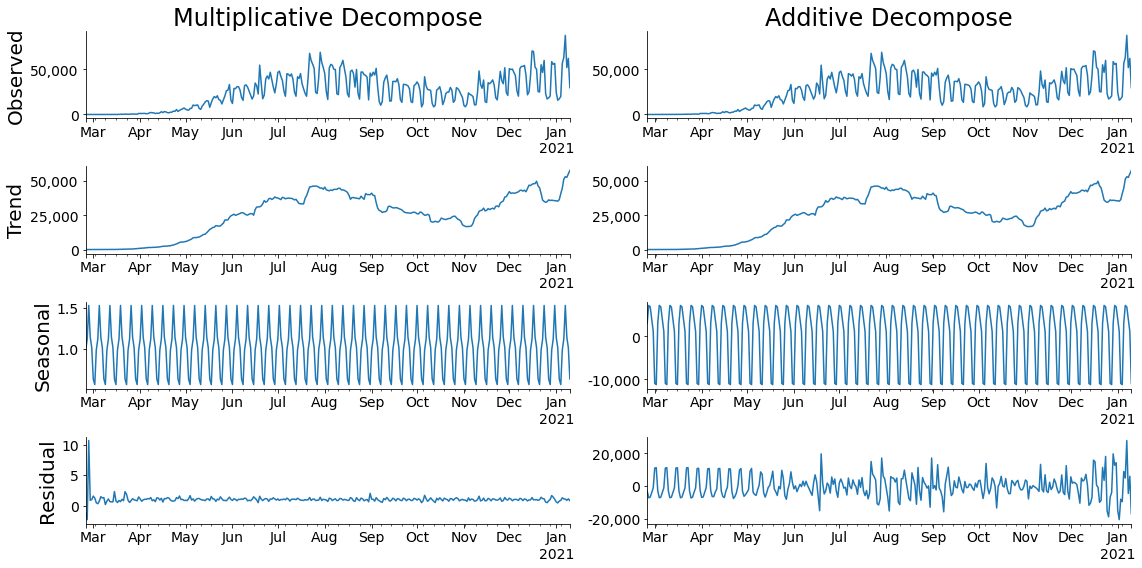

In [74]:
# setting data as index
#df_covidBR.set_index('Date')

# multiplicative decomposition
# replaces 0 values with 1, as multiplication by 0 can be problematic for this decomposition and a difference of 1 is not significative
# must set frequency of date index, in this case to daily (D)
mult_decomp = seasonal_decompose(df_covidBR.set_index('Date')['NewCases'].replace(0, 1).asfreq('D'), model='multiplicative', extrapolate_trend='freq')
# additive decomposition
add_decomp = seasonal_decompose(df_covidBR.set_index('Date')['NewCases'].asfreq('D'), model='additive', extrapolate_trend='freq')

# plots multiple graphs
fig, ax = plt.subplots(4, 2, figsize=(16, 8))
mult_decomp.observed.plot(ax=ax[0, 0])
ax[0, 0].set_ylabel('Observed')
ax[0, 0].set_xlabel(None)
ax[0, 0].set_title('Multiplicative Decompose')
ax[0, 0].yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
mult_decomp.trend.plot(ax=ax[1, 0])
ax[1, 0].set_ylabel('Trend')
ax[1, 0].set_xlabel(None)
ax[1, 0].yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
mult_decomp.seasonal.plot(ax=ax[2, 0])
ax[2, 0].set_ylabel('Seasonal')
ax[2, 0].set_xlabel(None)
mult_decomp.resid.plot(ax=ax[3, 0])
ax[3, 0].set_ylabel('Residual')
ax[3, 0].set_xlabel(None)
add_decomp.observed.plot(ax=ax[0, 1])
ax[0, 1].set_xlabel(None)
ax[0, 1].set_title('Additive Decompose')
ax[0, 1].yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
add_decomp.trend.plot(ax=ax[1, 1])
ax[1, 1].set_xlabel(None)
ax[1, 1].yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
add_decomp.seasonal.plot(ax=ax[2, 1])
ax[2, 1].set_xlabel(None)
ax[2, 1].yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
add_decomp.resid.plot(ax=ax[3, 1])
ax[3, 1].set_xlabel(None)
ax[3, 1].yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.tight_layout()
plt.show();

The trend component seem similar in both decomposition methods and both seem to capture a strong seasonal component. The residual graph for additive decomposition shows signs of seasonal components still. As such, multiplicative decomposition is the most appropriate method for this time series.

To discover what algorithm best learns the available data and makes more accurate predictions, the following models were tested:

- ARIMA
- Auto-ARIMA
- Prophet